In [1]:
import os, sys
sys.path.append('/Applications/Python_Files/')

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
# from iminuit import Minuit
import modules_VX_X as mod

def heatmap(inputdata, ring):
    xvalues = inputdata.get(inputdata.keys()[-1])
    column = ring
    labelsize = 18
    timestep = 5/60
    binstep = xvalues[1] - xvalues[0]
    lower = xvalues[0]
    upper = xvalues[-1]
    xaxis = [np.ones(len(xvalues))*timestep*(i + 0.5) for i in range(len(inputdata.keys()) - 1)]
    xaxis = np.array(xaxis).flatten()
    yaxis = [xvalues for i in range(len(inputdata.keys()) - 1)]
    yaxis = np.array(yaxis).flatten()
    weights = [inputdata.get(col) for col in column]
    weights = np.array(weights).flatten()
    fig, ax = plt.subplots(figsize = (20, 10))
    hist = ax.hist2d(xaxis, yaxis, bins = (np.arange(0, timestep*len(inputdata.keys()), timestep),
                                           np.arange(lower - binstep/2, upper + binstep/2, binstep)),
                     weights = weights, cmax = 2000)
    #Set x-axis
    A = ax.set_xlabel('Time (hours)', size = labelsize, **{'fontname': 'Times New Roman'})
    A = ax.set_xlim(0, timestep*len(ring))
    A = ax.set_xticks(np.arange(0, timestep*len(ring), 1))
    A = ax.set_xticklabels(ax.get_xticks(), **{'fontname': 'Times New Roman'})
    #Set y-axis
    #A = ax.set_ylabel('Simulated Channel', size = labelsize, **{'fontname': 'Times New Roman'})
    A = ax.set_ylabel('Energy (eV)', size = labelsize, **{'fontname': 'Times New Roman'})
    #A = ax.set_ylim(740, 3740)
    #A = ax.set_yticks(np.arange(1000, 3600, 500))
    A = ax.set_ylim(16 + 2/3, 124 + 2/3)
    A = ax.set_yticks(np.arange(0, 1100, 200))
    A = ax.set_yticklabels(ax.get_yticks(), **{'fontname': 'Times New Roman'})
    #Set general
    A = ax.tick_params(top = False, right = False, left = True, direction = 'inout',
               size = 5,  width = 1, labelleft = True, labelbottom = True,
               labelsize = 0.8*labelsize, pad = 3)
    #     standard_fig_save('Heat_Map_Calibrated.png', path = data.path, height = 5, width = 5, ext = 'png')

# Load Data
This also does a fairly robust sorting of the columns to make sure they are in order so long as the format of the columns are: Column{delim}Name{delim}# where # must only be separated from the rest by some delimiter that is identifiable on its own ie a space, _, -, or other character. 

Additionally the the code currently expects the x-axis to be alphabetically after all the data columns for example: Window_# and x_axis works but MCA_Channel and Window_# will throw an error because MCA_Channel is not last in the python string sorting scheme.

In [2]:
# data = mod.impData(Path = "/Applications/Data-Processed/Livermore/191005/Laser_12p15A_p110e/", 
#                    fileList = ["Laser_12.15A_p110e.txt"], Delim = '\t', tline = 0)
data = mod.impData(Path = "/Applications/Data-Processed/Livermore/Ortec/ORTEC_Test/", 
                   fileList = ["Ortec1.txt"], Delim = '\t', tline = 1)
ring = data.keys()[:-1]
xcol = data.keys()[-1]
line = [row for row in ring if '1' in row][0]
delim = line[line.find('1')-1]
dnum = [it for it, item in enumerate(line.split(delim)) if '1' == item][0]
#print(line, delim, dnum, line.split(delim)[dnum])
ring.sort(key = lambda line: int(line.split(delim)[dnum]))
print("#####\t\t\tWarning! Warning! Warning!\t\t\t#####")
print("Insure that the column ouput in order or you will have errors in processing later!")
print("#####\t\t\tWarning! Warning! Warning!\t\t\t#####\n\n")
mod.dis(ring)

#####			Warning! Warning! Warning!			#####
Insure that the column ouput in order or you will have errors in processing later!
#####			Warning! Warning! Warning!			#####


000 	 Window_0
001 	 Window_1
002 	 Window_2
003 	 Window_3
004 	 Window_4
005 	 Window_5
006 	 Window_6
007 	 Window_7
008 	 Window_8
009 	 Window_9
010 	 Window_10
011 	 Window_11
012 	 Window_12
013 	 Window_13
014 	 Window_14
015 	 Window_15
016 	 Window_16
017 	 Window_17
018 	 Window_18
019 	 Window_19
020 	 Window_20
021 	 Window_21
022 	 Window_22
023 	 Window_23
024 	 Window_24
025 	 Window_25
026 	 Window_26
027 	 Window_27
028 	 Window_28
029 	 Window_29
030 	 Window_30
031 	 Window_31
032 	 Window_32
033 	 Window_33
034 	 Window_34
035 	 Window_35


# Generate Heat Map

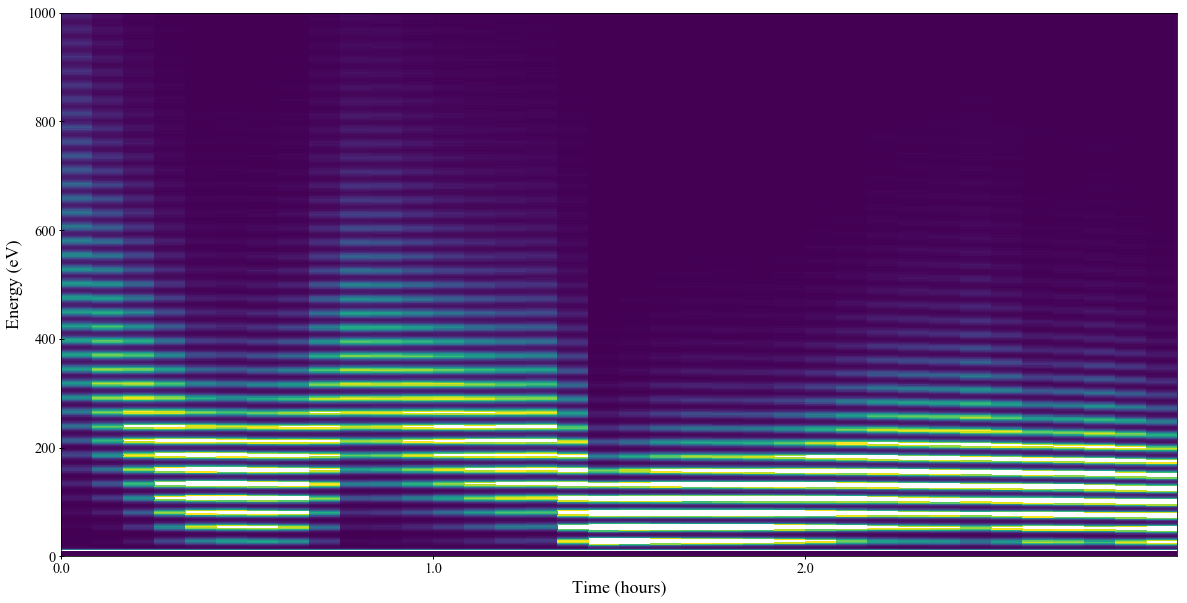

In [3]:
heatmap(data, ring)

Window_0
Average Distance: 29.394736842105264
First Peak: 9
Last Peak: 1126
Total Number of Peaks: 39
[   9   56   82  108  134  161  187  213  240  266  293  318  344  371
  397  424  449  476  502  528  556  581  608  633  659  686  711  736
  761  789  815  840  868  920  970  995 1046 1074 1126]
2
['Window_000', 'Window_001', 'Window_002']
Window_000
Window_001
Window_002


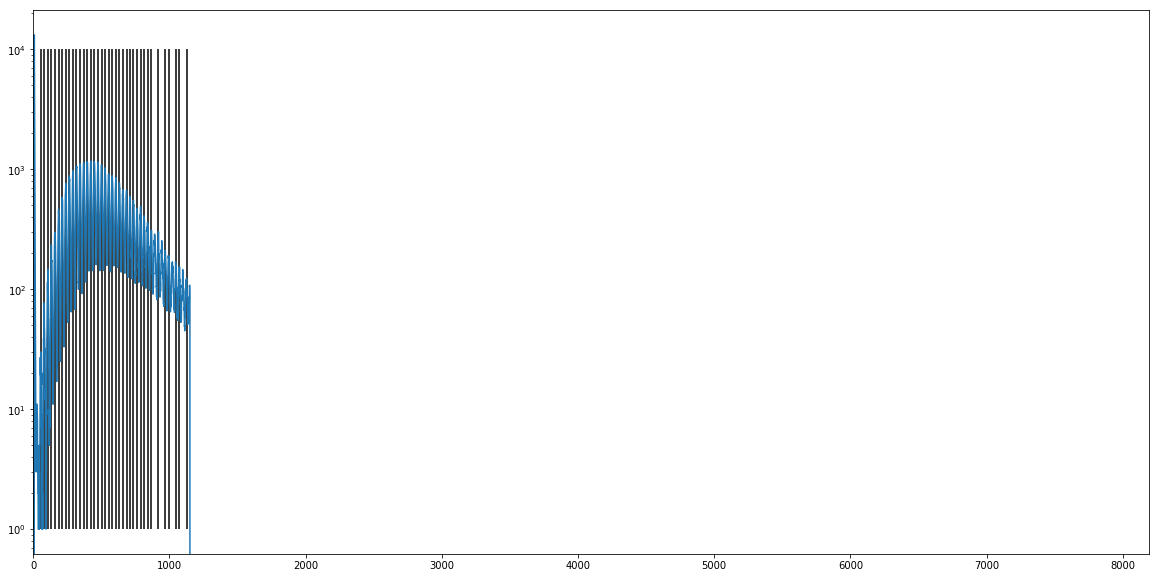

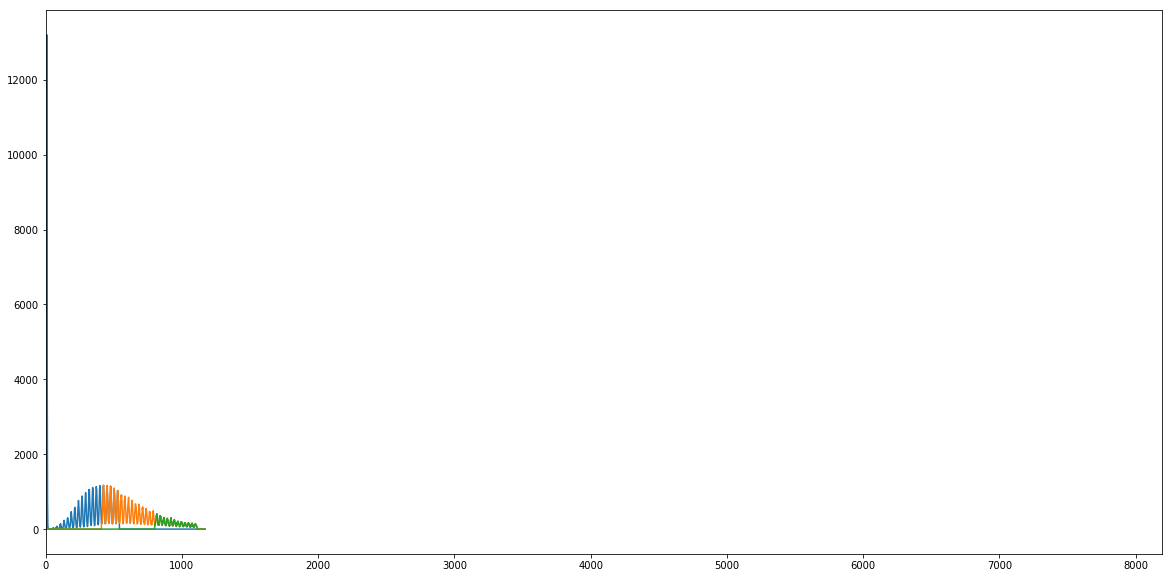

Window_1
Average Distance: 29.973684210526315
First Peak: 9
Last Peak: 1148
Total Number of Peaks: 39
[   9   55   82  107  133  159  187  213  239  265  291  318  344  371
  397  423  450  476  503  529  578  606  632  657  684  710  737  763
  790  839  866  896  942  971 1015 1045 1075 1121 1148]
5
['Window_000', 'Window_001', 'Window_002', 'Window_003', 'Window_004', 'Window_005']
Window_003
Window_004
Window_005


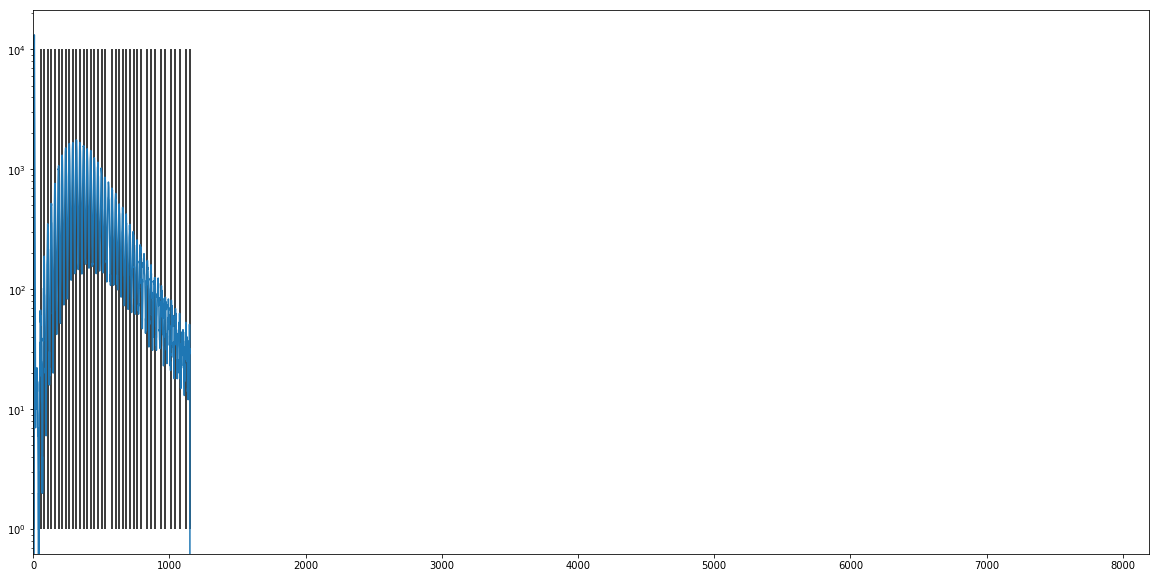

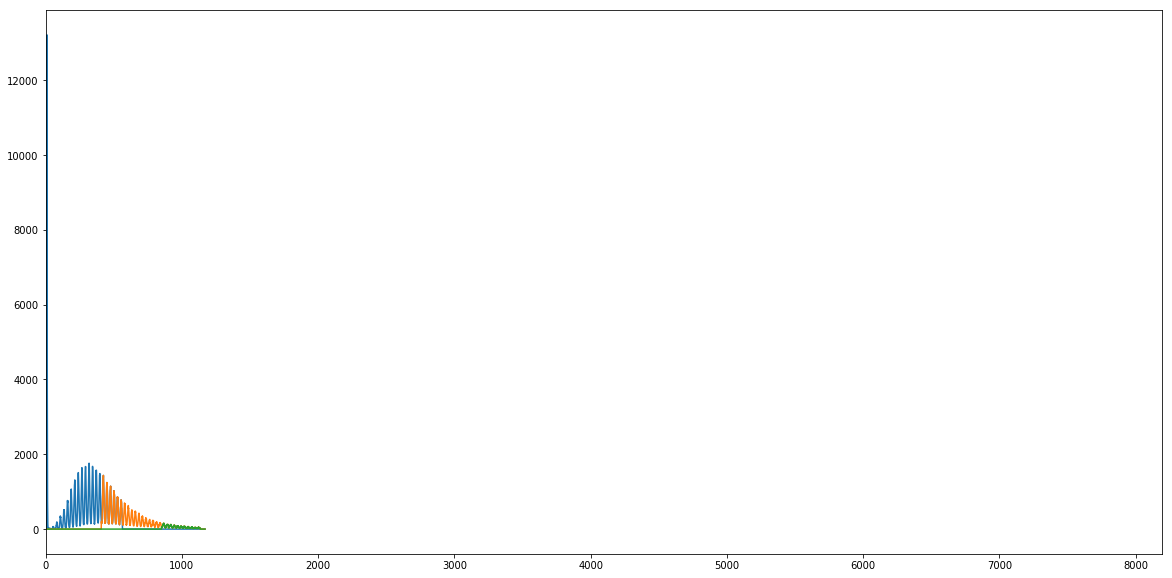

Window_2
Average Distance: 28.525
First Peak: 9
Last Peak: 1150
Total Number of Peaks: 41
[   9   54   81  108  133  160  186  212  239  265  292  317  345  370
  397  424  449  475  502  527  556  583  632  658  683  711  737  764
  790  815  841  866  894  922  966  995 1020 1048 1078 1120 1150]
8
['Window_000', 'Window_001', 'Window_002', 'Window_003', 'Window_004', 'Window_005', 'Window_006', 'Window_007', 'Window_008']
Window_006
Window_007
Window_008


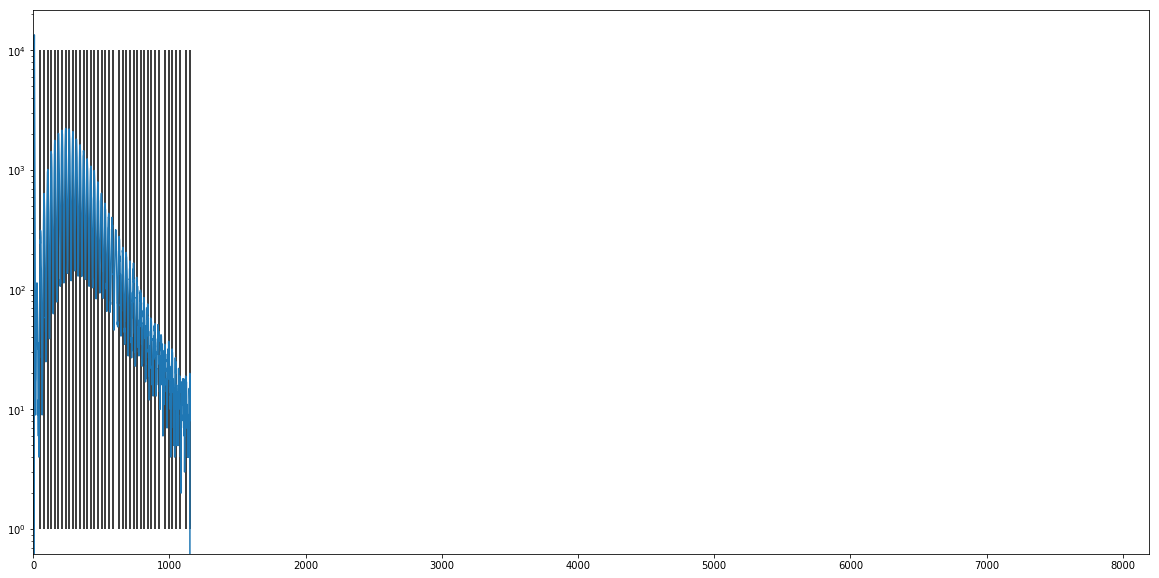

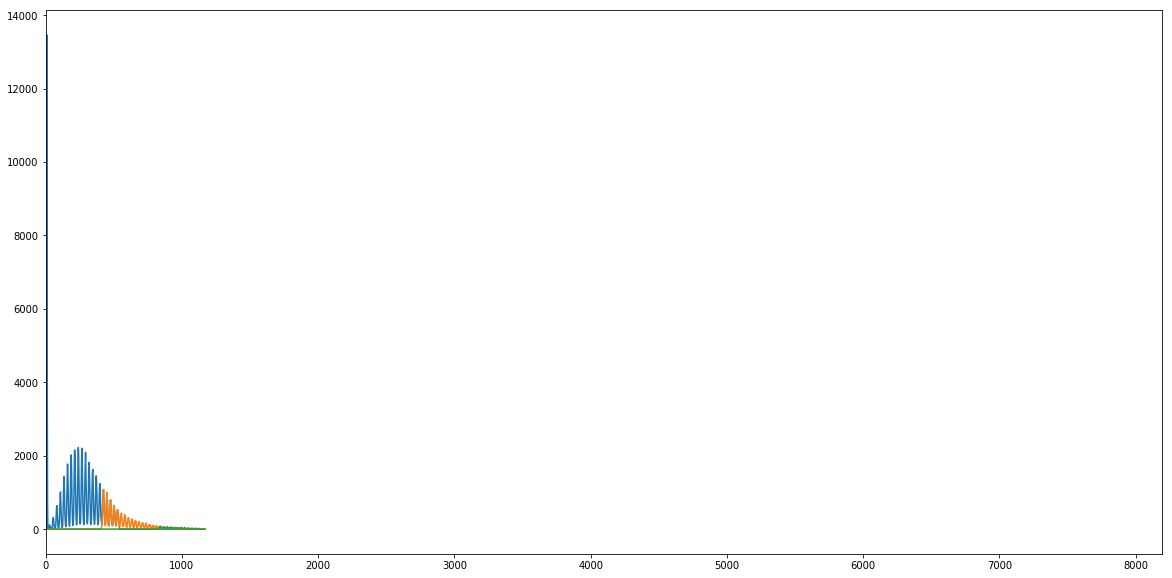

Window_3
Average Distance: 28.475
First Peak: 9
Last Peak: 1148
Total Number of Peaks: 41
[   9   54   80  107  133  160  186  213  239  264  291  318  344  370
  397  422  448  474  501  528  555  580  607  635  660  687  712  739
  764  789  815  842  867  915  945  970  997 1043 1077 1104 1148]
11
['Window_000', 'Window_001', 'Window_002', 'Window_003', 'Window_004', 'Window_005', 'Window_006', 'Window_007', 'Window_008', 'Window_009', 'Window_010', 'Window_011']
Window_009
Window_010
Window_011


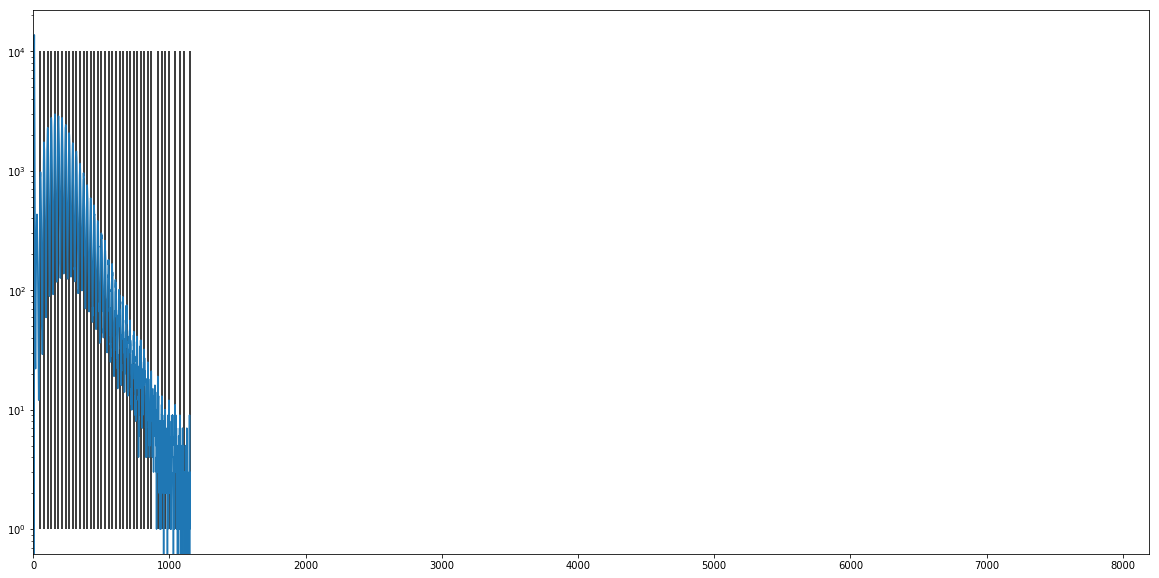

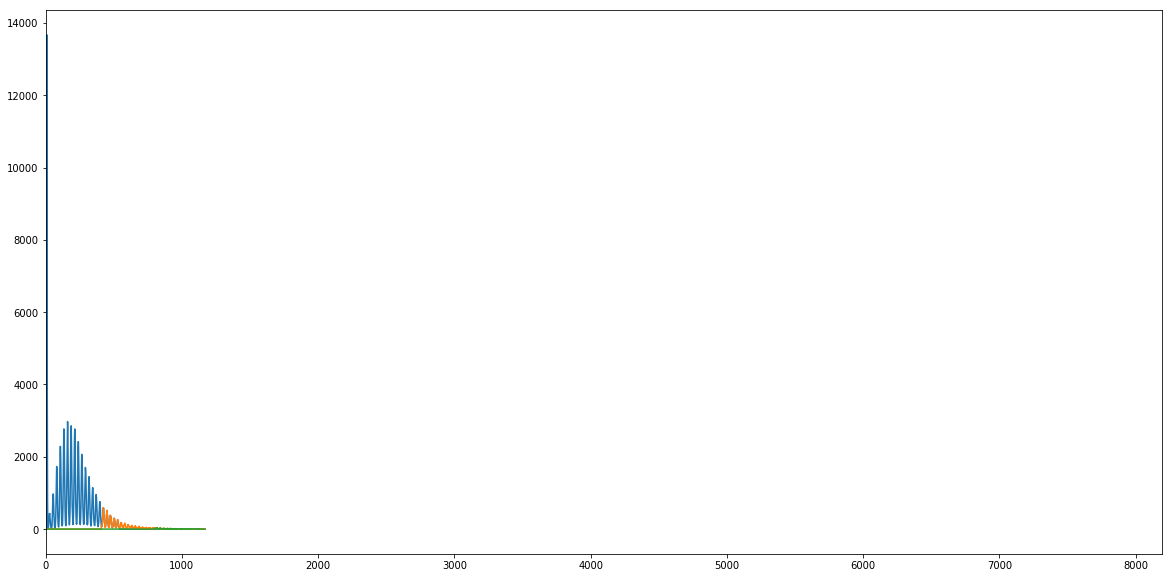

Window_4
Average Distance: 29.17948717948718
First Peak: 9
Last Peak: 1147
Total Number of Peaks: 40
[   9   55   80  107  133  160  186  213  239  265  291  318  344  370
  395  424  449  477  503  528  554  582  634  661  688  713  738  763
  791  817  845  871  897  923  950  975 1003 1030 1082 1147]
14
['Window_000', 'Window_001', 'Window_002', 'Window_003', 'Window_004', 'Window_005', 'Window_006', 'Window_007', 'Window_008', 'Window_009', 'Window_010', 'Window_011', 'Window_012', 'Window_013', 'Window_014']
Window_012
Window_013
Window_014


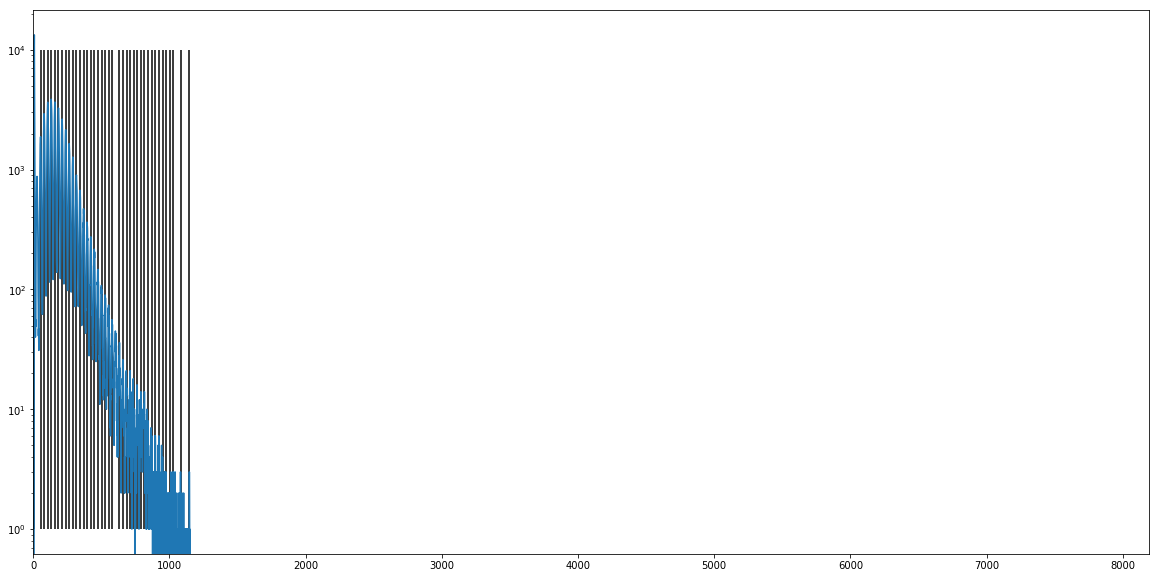

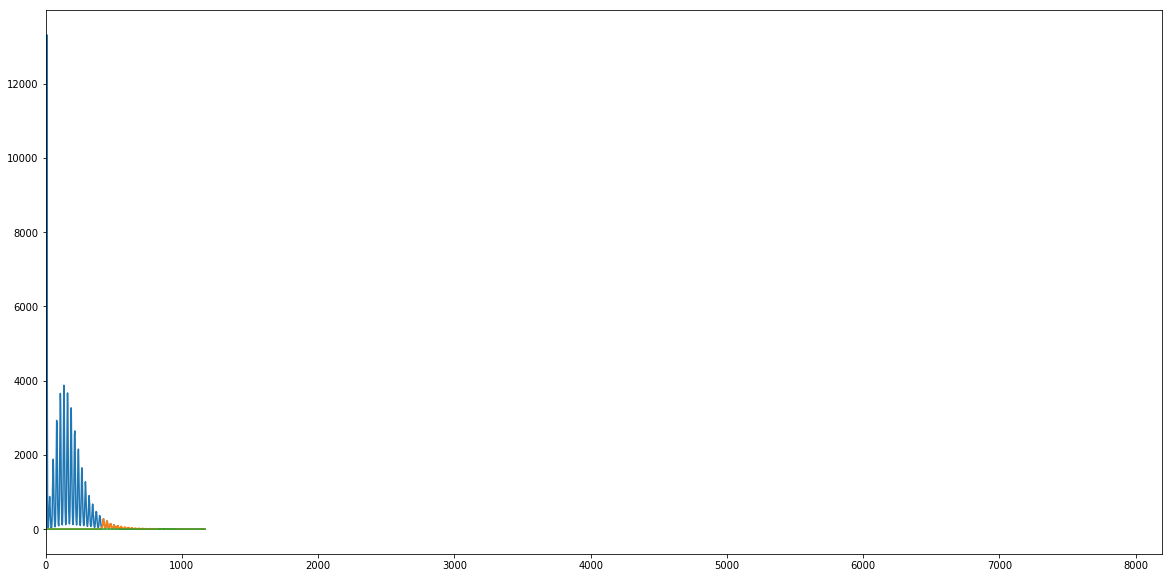

Window_5
Average Distance: 28.871794871794872
First Peak: 9
Last Peak: 1135
Total Number of Peaks: 40
[   9   54   80  107  134  160  186  213  239  265  292  317  344  369
  396  422  451  477  502  530  556  582  632  660  685  710  739  765
  792  817  867  894  931  969  995 1020 1046 1071 1100 1135]
17
['Window_000', 'Window_001', 'Window_002', 'Window_003', 'Window_004', 'Window_005', 'Window_006', 'Window_007', 'Window_008', 'Window_009', 'Window_010', 'Window_011', 'Window_012', 'Window_013', 'Window_014', 'Window_015', 'Window_016', 'Window_017']
Window_015
Window_016
Window_017


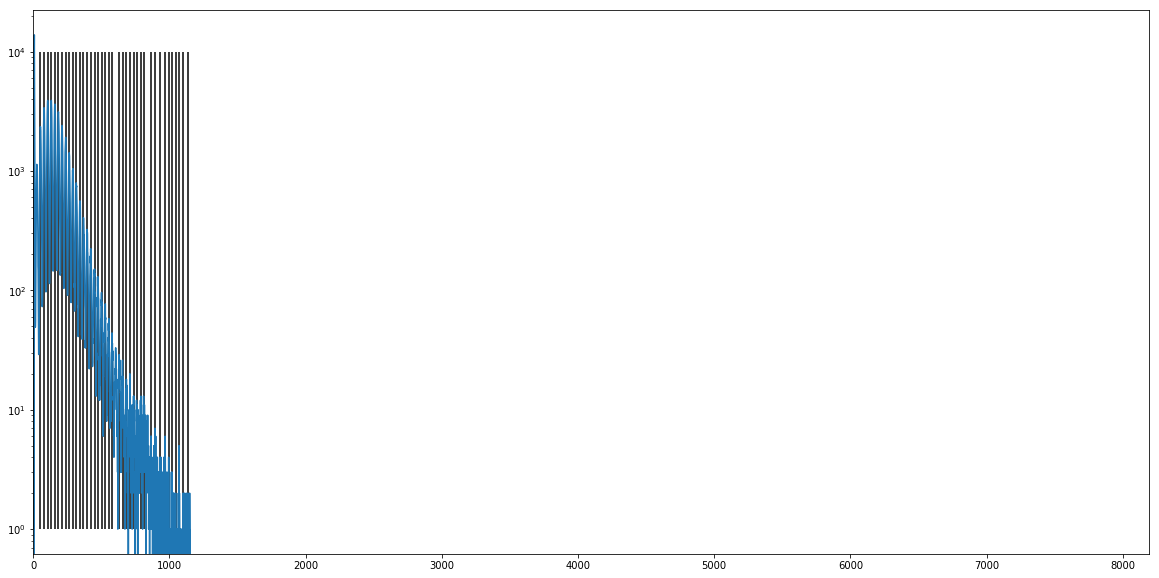

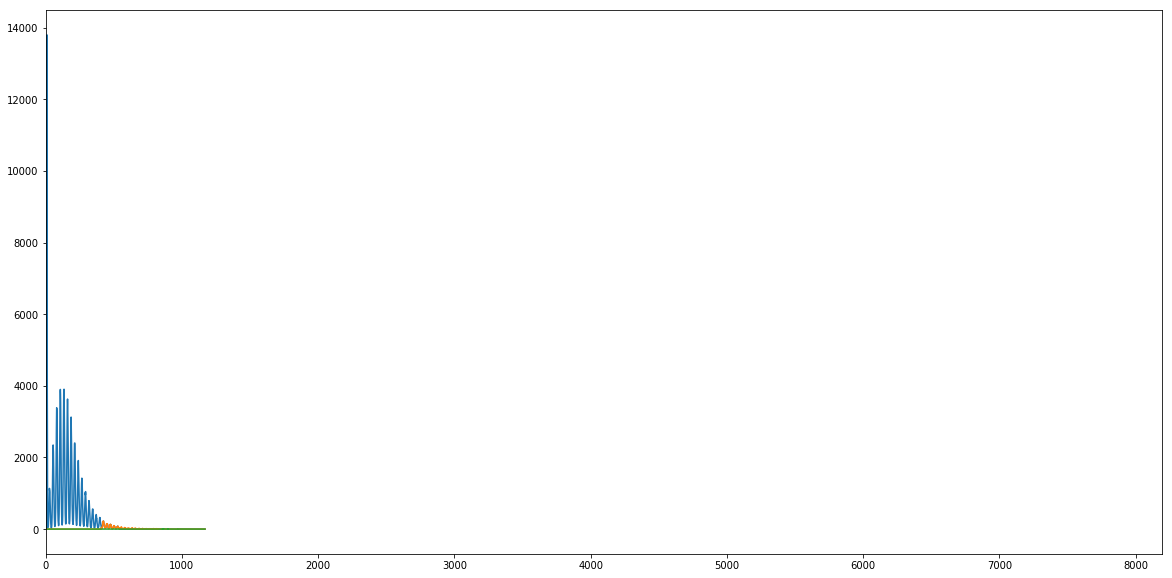

Window_6
Average Distance: 29.153846153846153
First Peak: 9
Last Peak: 1146
Total Number of Peaks: 40
[   9   53   80  106  133  160  185  211  237  263  290  316  342  370
  396  422  447  474  500  526  552  577  602  632  659  685  710  759
  785  814  863  890  916  941  986 1016 1042 1071 1104 1146]
20
['Window_000', 'Window_001', 'Window_002', 'Window_003', 'Window_004', 'Window_005', 'Window_006', 'Window_007', 'Window_008', 'Window_009', 'Window_010', 'Window_011', 'Window_012', 'Window_013', 'Window_014', 'Window_015', 'Window_016', 'Window_017', 'Window_018', 'Window_019', 'Window_020']
Window_018
Window_019
Window_020


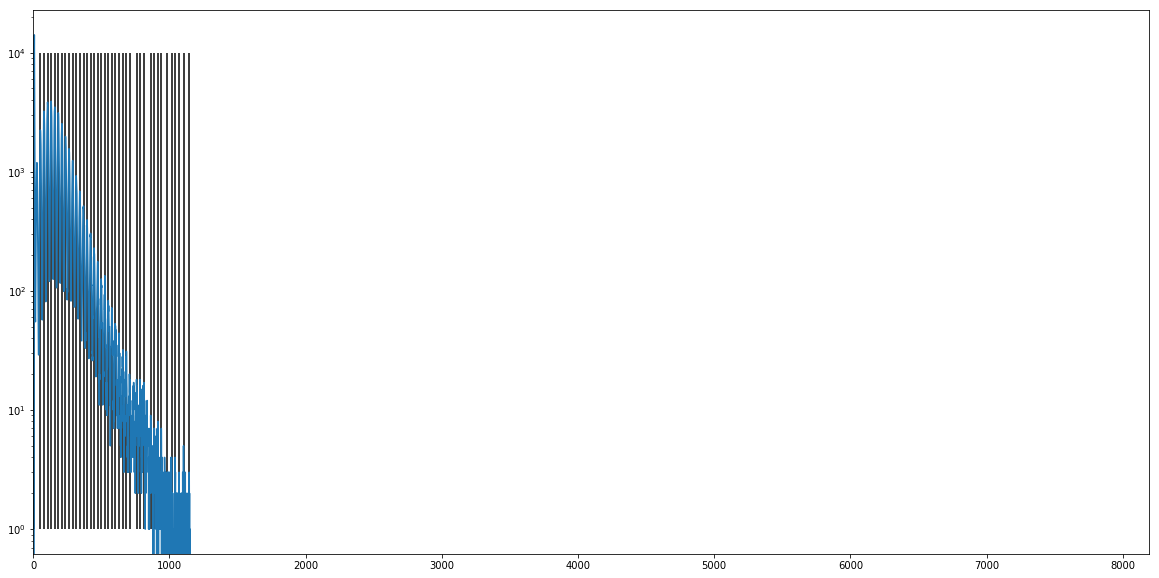

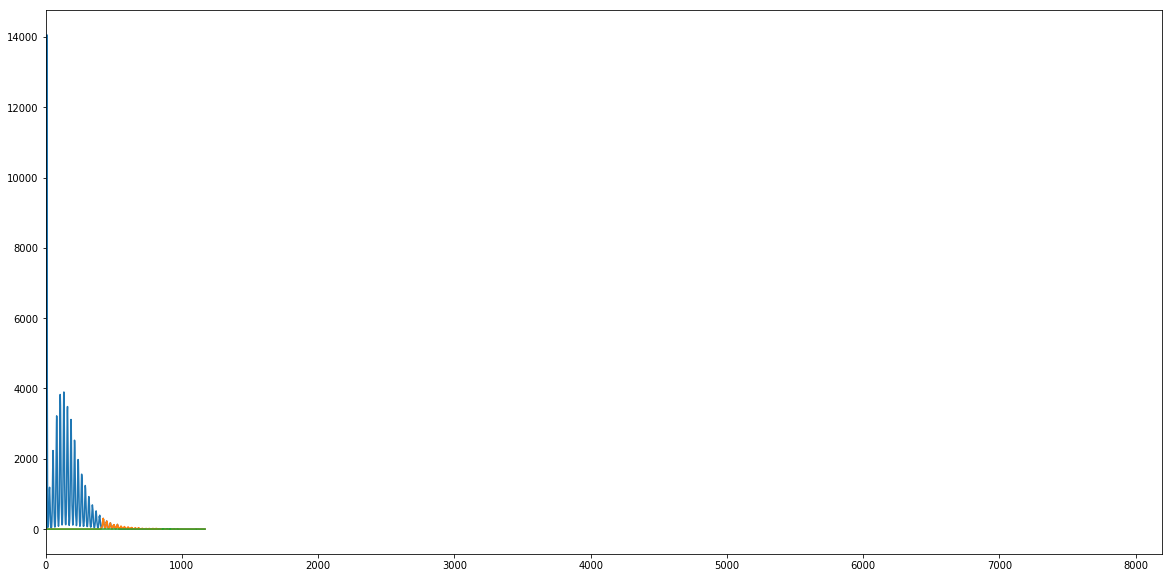

Window_7
Average Distance: 28.025
First Peak: 9
Last Peak: 1130
Total Number of Peaks: 41
[   9   54   80  106  132  159  184  211  238  265  291  317  342  370
  396  421  448  473  501  528  554  580  606  631  657  683  733  760
  786  813  841  866  891  918  963  989 1016 1043 1071 1100 1130]
23
['Window_000', 'Window_001', 'Window_002', 'Window_003', 'Window_004', 'Window_005', 'Window_006', 'Window_007', 'Window_008', 'Window_009', 'Window_010', 'Window_011', 'Window_012', 'Window_013', 'Window_014', 'Window_015', 'Window_016', 'Window_017', 'Window_018', 'Window_019', 'Window_020', 'Window_021', 'Window_022', 'Window_023']
Window_021
Window_022
Window_023


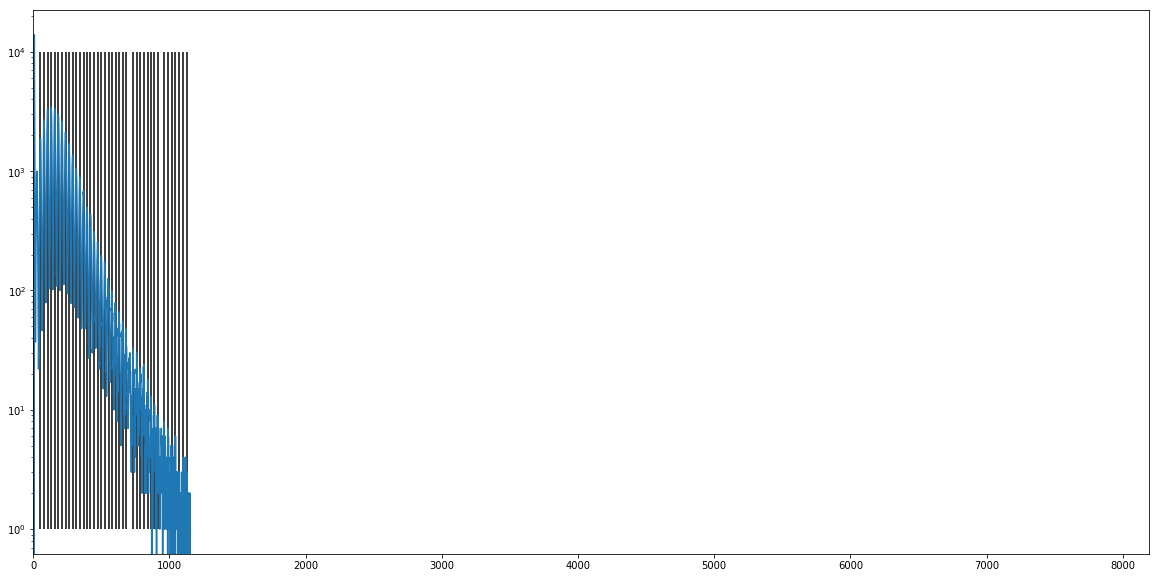

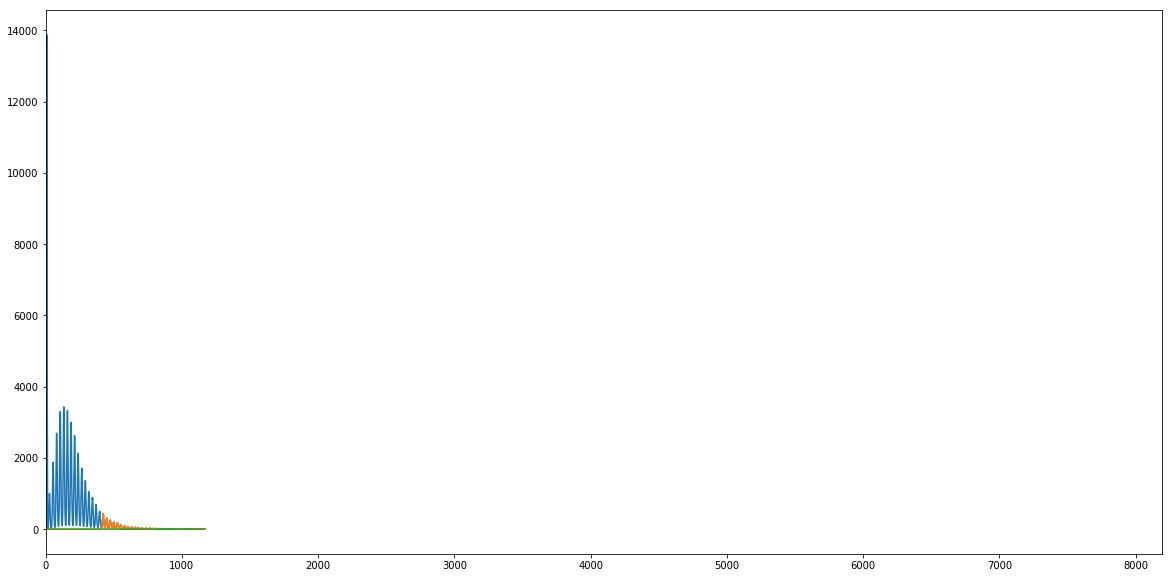

Window_8
Average Distance: 29.17948717948718
First Peak: 9
Last Peak: 1147
Total Number of Peaks: 40
[   9   53   80  107  133  159  186  212  238  265  291  317  342  368
  395  421  447  474  500  526  552  577  606  633  682  708  733  759
  787  812  837  865  914  940  965 1014 1043 1073 1122 1147]
26
['Window_000', 'Window_001', 'Window_002', 'Window_003', 'Window_004', 'Window_005', 'Window_006', 'Window_007', 'Window_008', 'Window_009', 'Window_010', 'Window_011', 'Window_012', 'Window_013', 'Window_014', 'Window_015', 'Window_016', 'Window_017', 'Window_018', 'Window_019', 'Window_020', 'Window_021', 'Window_022', 'Window_023', 'Window_024', 'Window_025', 'Window_026']
Window_024
Window_025
Window_026


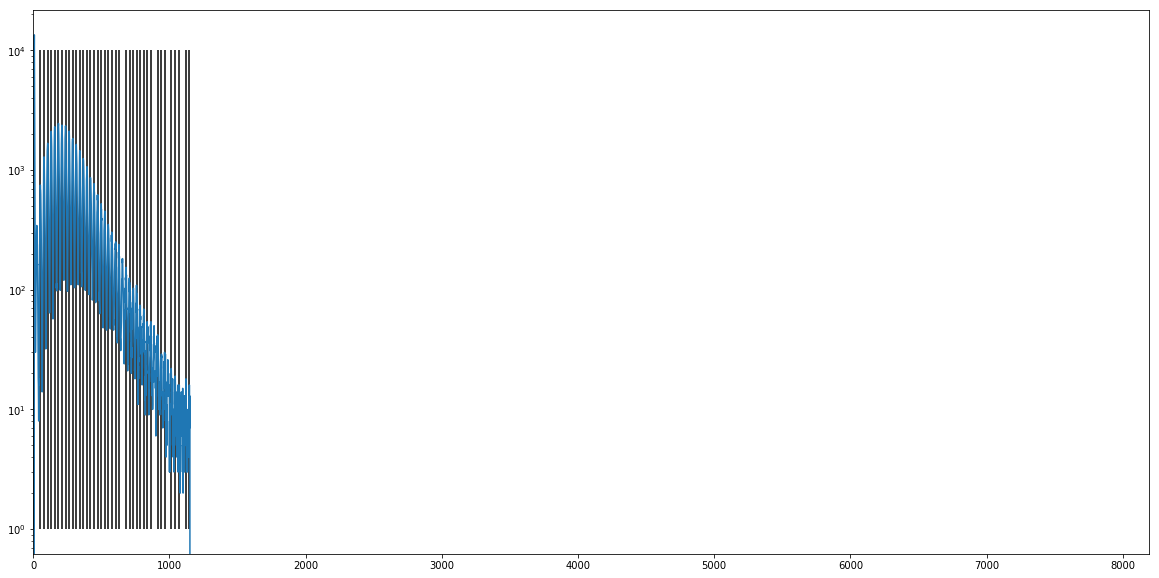

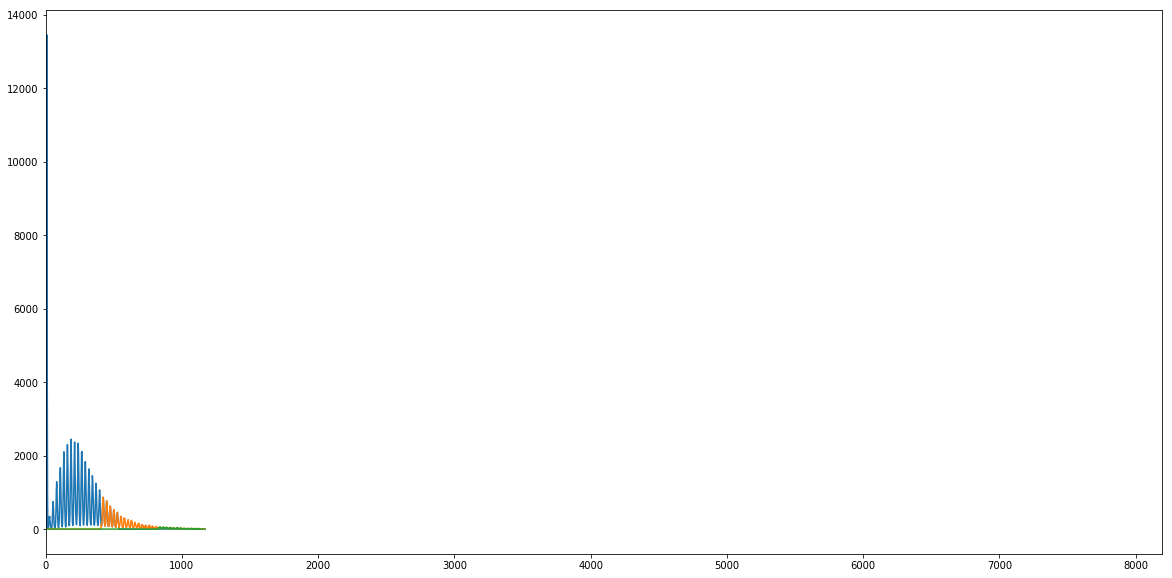

Window_9
Average Distance: 29.128205128205128
First Peak: 9
Last Peak: 1145
Total Number of Peaks: 40
[   9   55   80  107  134  159  186  212  238  265  291  317  343  368
  395  422  447  474  499  527  552  579  606  654  681  707  734  759
  784  812  862  890  916  941  967  995 1040 1071 1120 1145]
29
['Window_000', 'Window_001', 'Window_002', 'Window_003', 'Window_004', 'Window_005', 'Window_006', 'Window_007', 'Window_008', 'Window_009', 'Window_010', 'Window_011', 'Window_012', 'Window_013', 'Window_014', 'Window_015', 'Window_016', 'Window_017', 'Window_018', 'Window_019', 'Window_020', 'Window_021', 'Window_022', 'Window_023', 'Window_024', 'Window_025', 'Window_026', 'Window_027', 'Window_028', 'Window_029']
Window_027
Window_028
Window_029


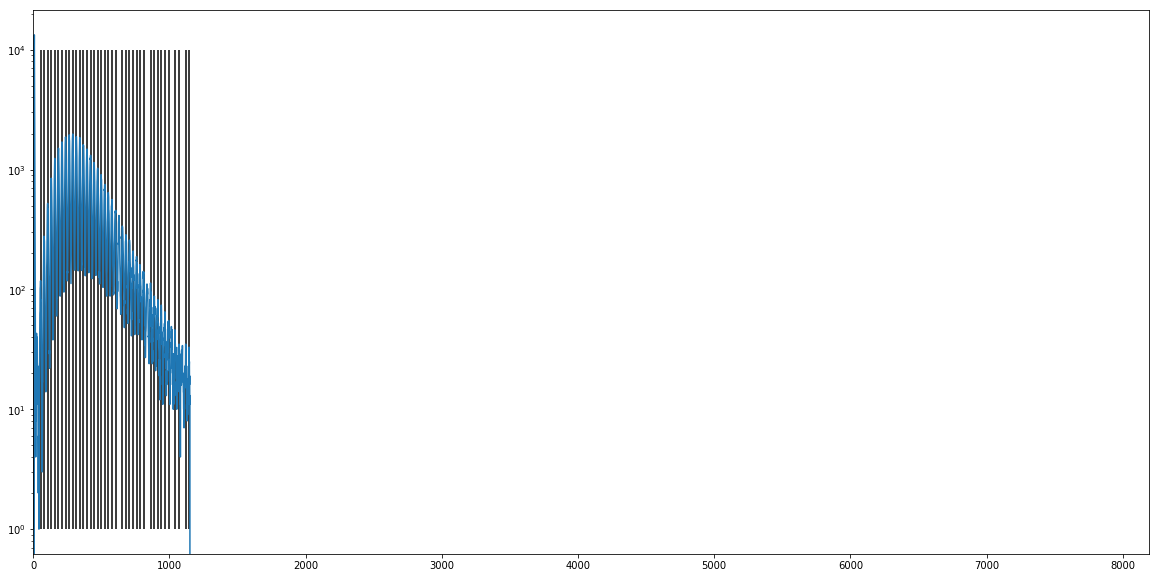

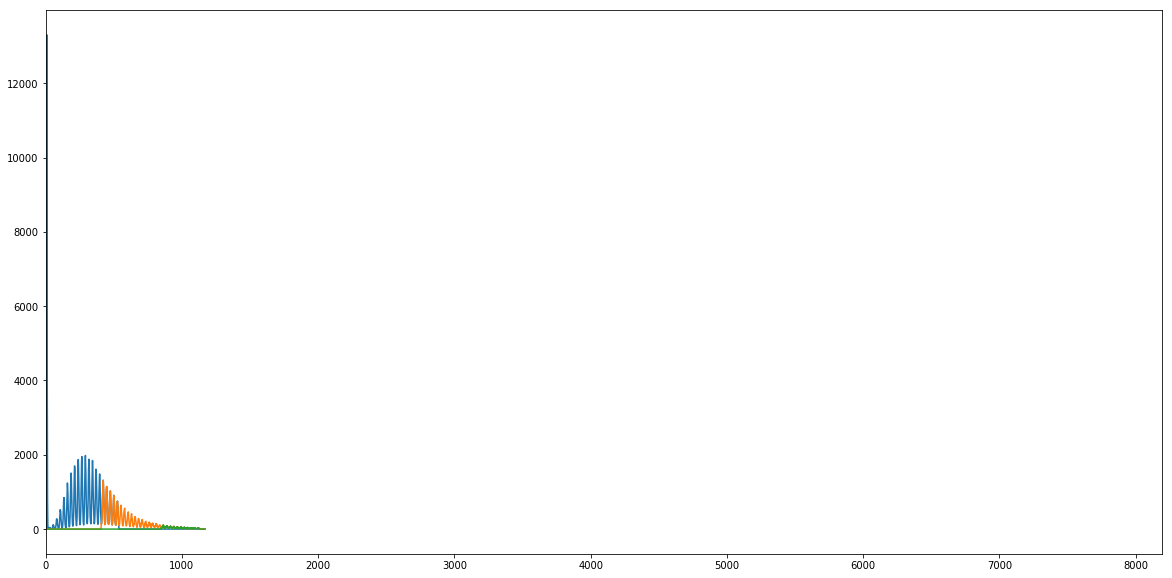

Window_10
Average Distance: 29.23076923076923
First Peak: 9
Last Peak: 1149
Total Number of Peaks: 40
[   9   54   80  106  133  160  186  213  238  265  291  317  342  369
  395  422  447  474  499  525  550  578  604  630  656  681  708  735
  760  811  837  865  891  936  967  994 1020 1069 1118 1149]
32
['Window_000', 'Window_001', 'Window_002', 'Window_003', 'Window_004', 'Window_005', 'Window_006', 'Window_007', 'Window_008', 'Window_009', 'Window_010', 'Window_011', 'Window_012', 'Window_013', 'Window_014', 'Window_015', 'Window_016', 'Window_017', 'Window_018', 'Window_019', 'Window_020', 'Window_021', 'Window_022', 'Window_023', 'Window_024', 'Window_025', 'Window_026', 'Window_027', 'Window_028', 'Window_029', 'Window_030', 'Window_031', 'Window_032']
Window_030
Window_031
Window_032


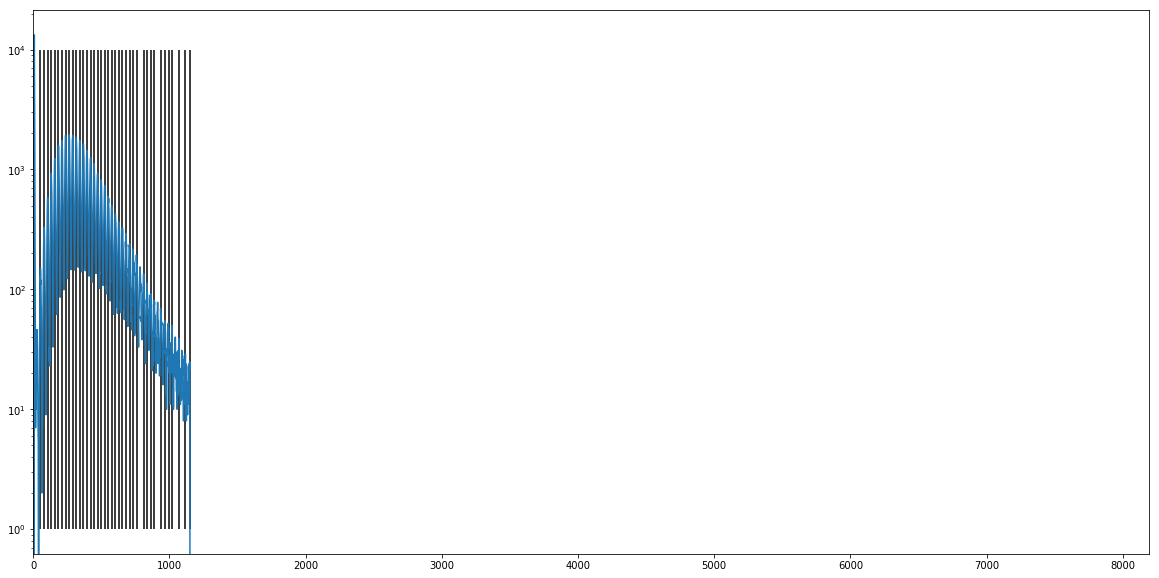

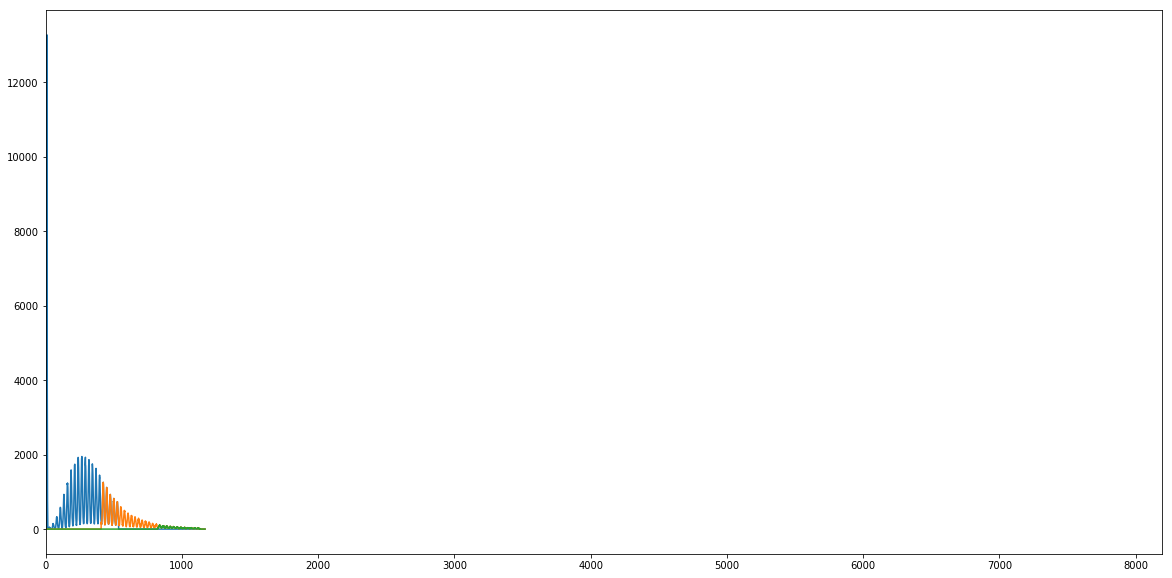

Window_11
Average Distance: 28.475
First Peak: 9
Last Peak: 1148
Total Number of Peaks: 41
[   9   54   80  107  134  160  186  212  239  264  290  317  342  368
  396  422  447  473  499  525  552  578  604  629  657  683  709  735
  763  814  839  864  889  914  943  991 1019 1045 1072 1122 1148]
35
['Window_000', 'Window_001', 'Window_002', 'Window_003', 'Window_004', 'Window_005', 'Window_006', 'Window_007', 'Window_008', 'Window_009', 'Window_010', 'Window_011', 'Window_012', 'Window_013', 'Window_014', 'Window_015', 'Window_016', 'Window_017', 'Window_018', 'Window_019', 'Window_020', 'Window_021', 'Window_022', 'Window_023', 'Window_024', 'Window_025', 'Window_026', 'Window_027', 'Window_028', 'Window_029', 'Window_030', 'Window_031', 'Window_032', 'Window_033', 'Window_034', 'Window_035']
Window_033
Window_034
Window_035


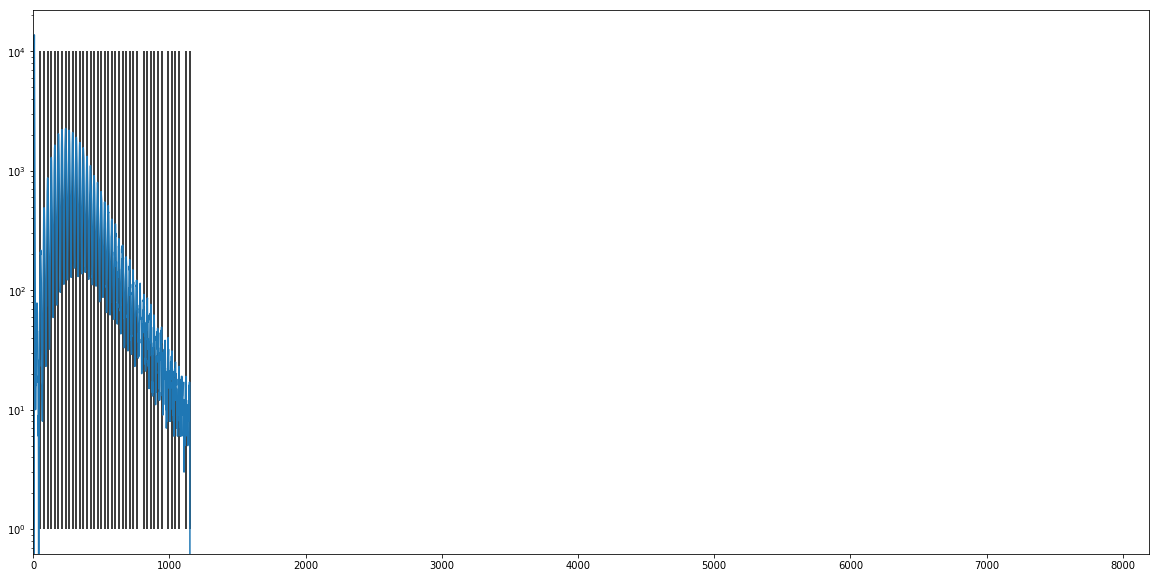

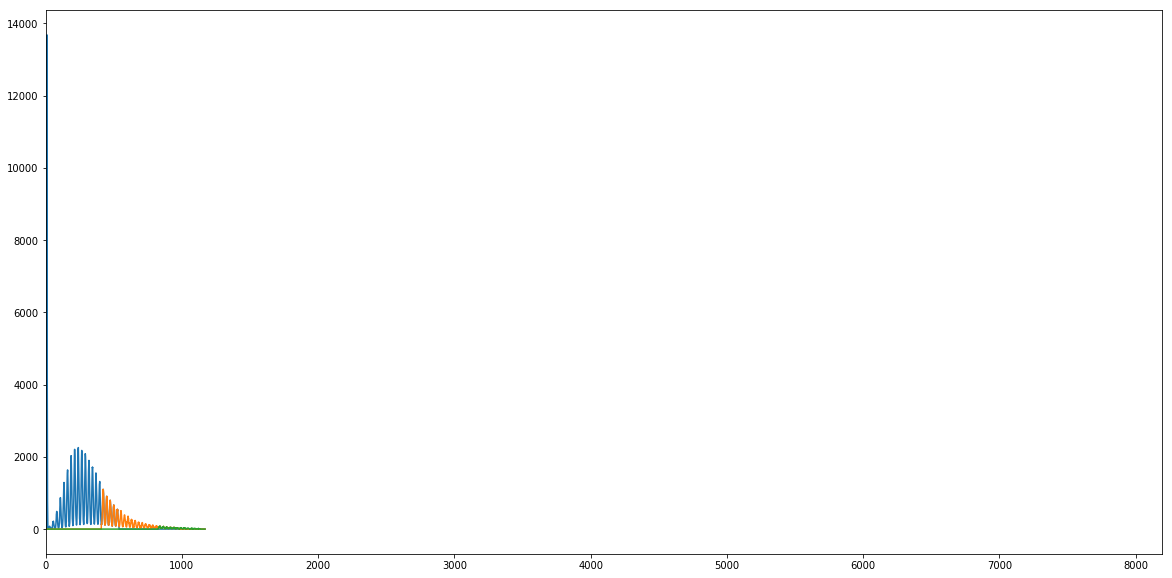

Window_12
Average Distance: 29.153846153846153
First Peak: 9
Last Peak: 1146
Total Number of Peaks: 40
[   9   53   81  108  134  160  186  213  238  265  291  318  343  369
  395  421  447  474  499  525  552  579  604  630  656  682  711  762
  788  815  841  888  914  943  991 1017 1044 1072 1097 1146]
38
['Window_000', 'Window_001', 'Window_002', 'Window_003', 'Window_004', 'Window_005', 'Window_006', 'Window_007', 'Window_008', 'Window_009', 'Window_010', 'Window_011', 'Window_012', 'Window_013', 'Window_014', 'Window_015', 'Window_016', 'Window_017', 'Window_018', 'Window_019', 'Window_020', 'Window_021', 'Window_022', 'Window_023', 'Window_024', 'Window_025', 'Window_026', 'Window_027', 'Window_028', 'Window_029', 'Window_030', 'Window_031', 'Window_032', 'Window_033', 'Window_034', 'Window_035', 'Window_036', 'Window_037', 'Window_038']
Window_036
Window_037
Window_038


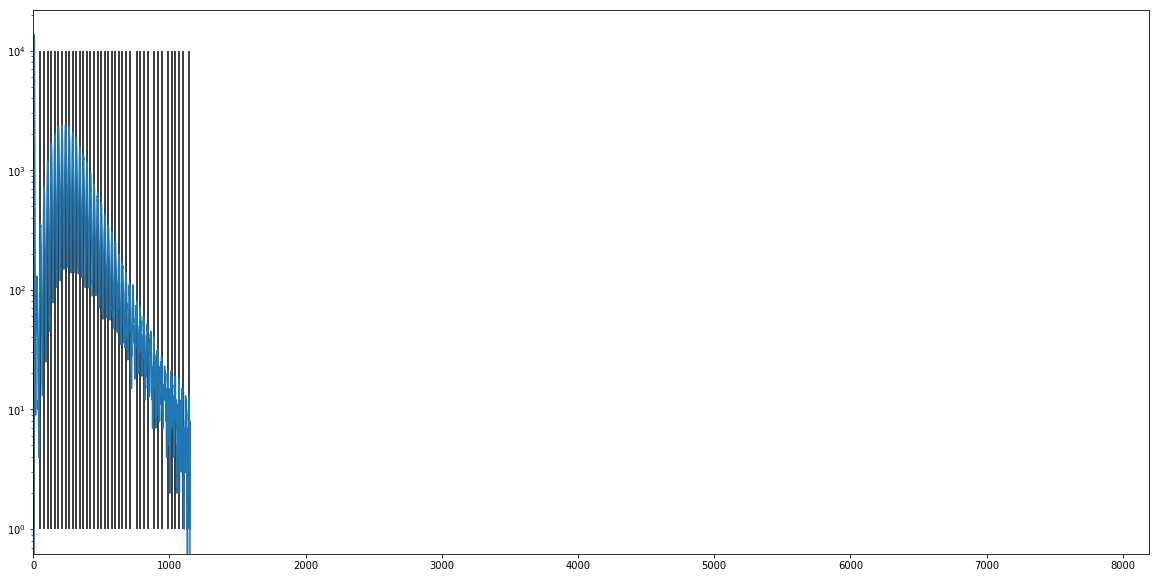

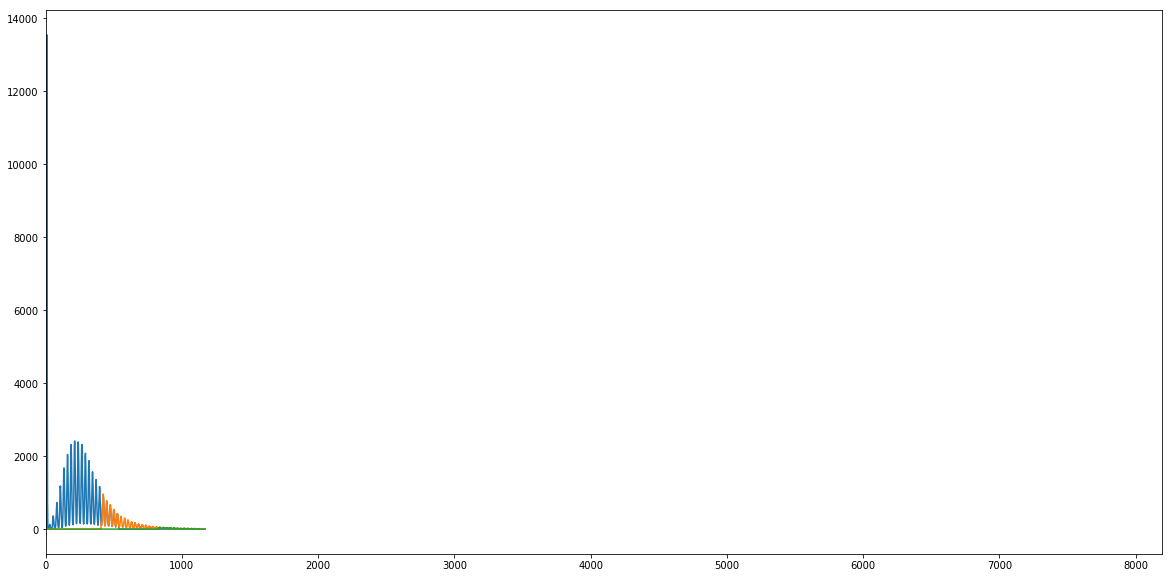

Window_13
Average Distance: 30.05263157894737
First Peak: 9
Last Peak: 1151
Total Number of Peaks: 39
[   9   54   81  107  133  159  185  213  239  264  292  343  369  395
  422  448  473  499  526  552  578  604  632  683  709  759  785  811
  836  861  886  912  938  966  992 1020 1070 1106 1151]
41
['Window_000', 'Window_001', 'Window_002', 'Window_003', 'Window_004', 'Window_005', 'Window_006', 'Window_007', 'Window_008', 'Window_009', 'Window_010', 'Window_011', 'Window_012', 'Window_013', 'Window_014', 'Window_015', 'Window_016', 'Window_017', 'Window_018', 'Window_019', 'Window_020', 'Window_021', 'Window_022', 'Window_023', 'Window_024', 'Window_025', 'Window_026', 'Window_027', 'Window_028', 'Window_029', 'Window_030', 'Window_031', 'Window_032', 'Window_033', 'Window_034', 'Window_035', 'Window_036', 'Window_037', 'Window_038', 'Window_039', 'Window_040', 'Window_041']
Window_039
Window_040
Window_041


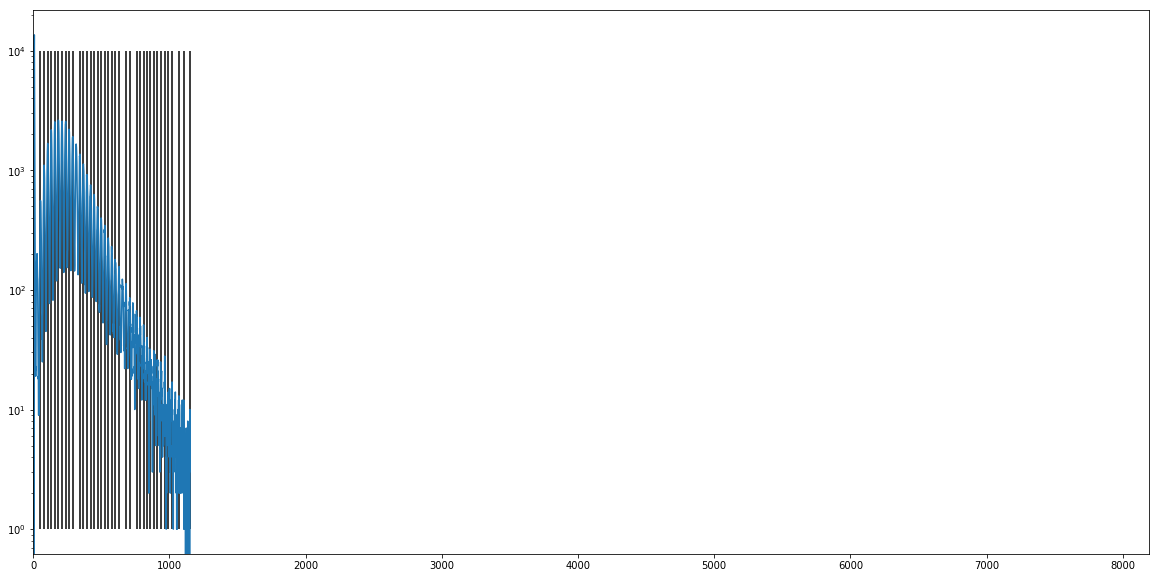

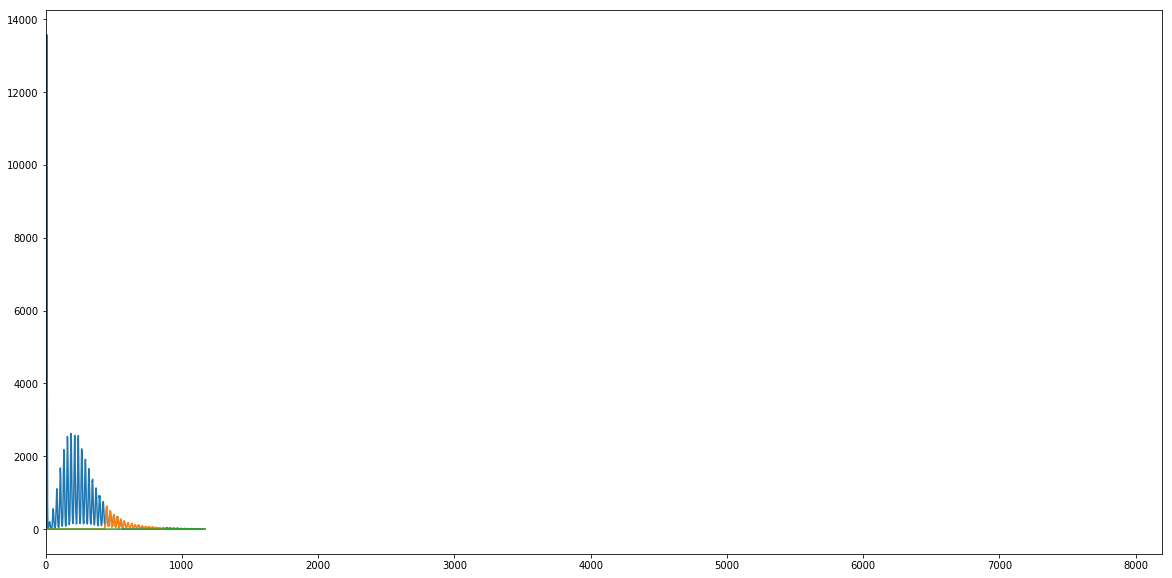

Window_14
Average Distance: 29.102564102564102
First Peak: 9
Last Peak: 1144
Total Number of Peaks: 40
[   9   55   81  107  133  159  186  212  237  265  290  317  344  370
  396  421  447  474  501  528  553  579  631  659  688  735  763  812
  837  863  889  915  948  974 1011 1041 1066 1091 1119 1144]
44
['Window_000', 'Window_001', 'Window_002', 'Window_003', 'Window_004', 'Window_005', 'Window_006', 'Window_007', 'Window_008', 'Window_009', 'Window_010', 'Window_011', 'Window_012', 'Window_013', 'Window_014', 'Window_015', 'Window_016', 'Window_017', 'Window_018', 'Window_019', 'Window_020', 'Window_021', 'Window_022', 'Window_023', 'Window_024', 'Window_025', 'Window_026', 'Window_027', 'Window_028', 'Window_029', 'Window_030', 'Window_031', 'Window_032', 'Window_033', 'Window_034', 'Window_035', 'Window_036', 'Window_037', 'Window_038', 'Window_039', 'Window_040', 'Window_041', 'Window_042', 'Window_043', 'Window_044']
Window_042
Window_043
Window_044


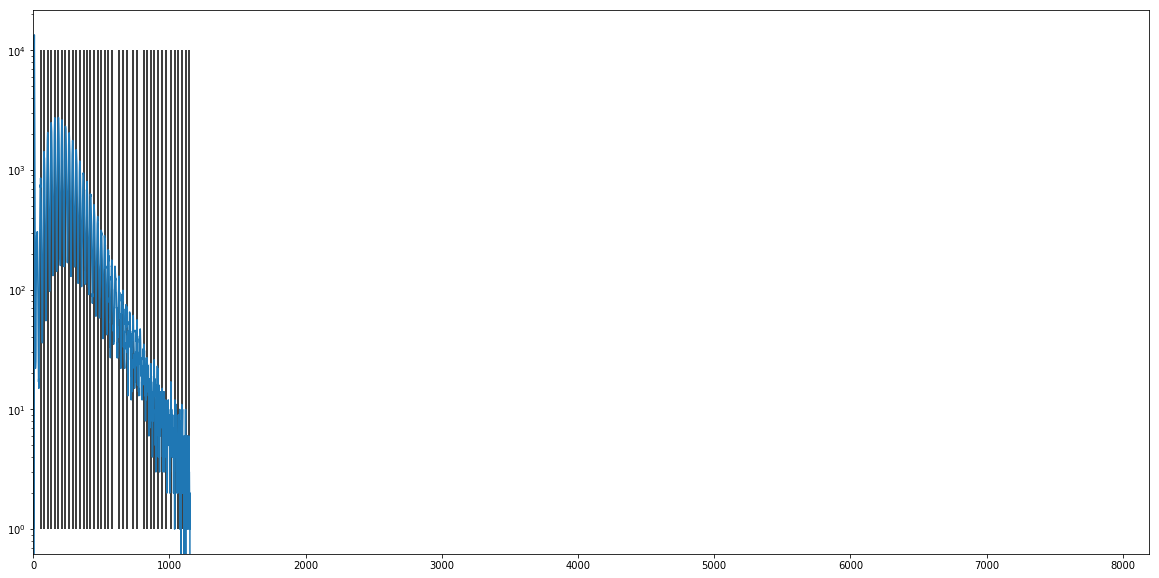

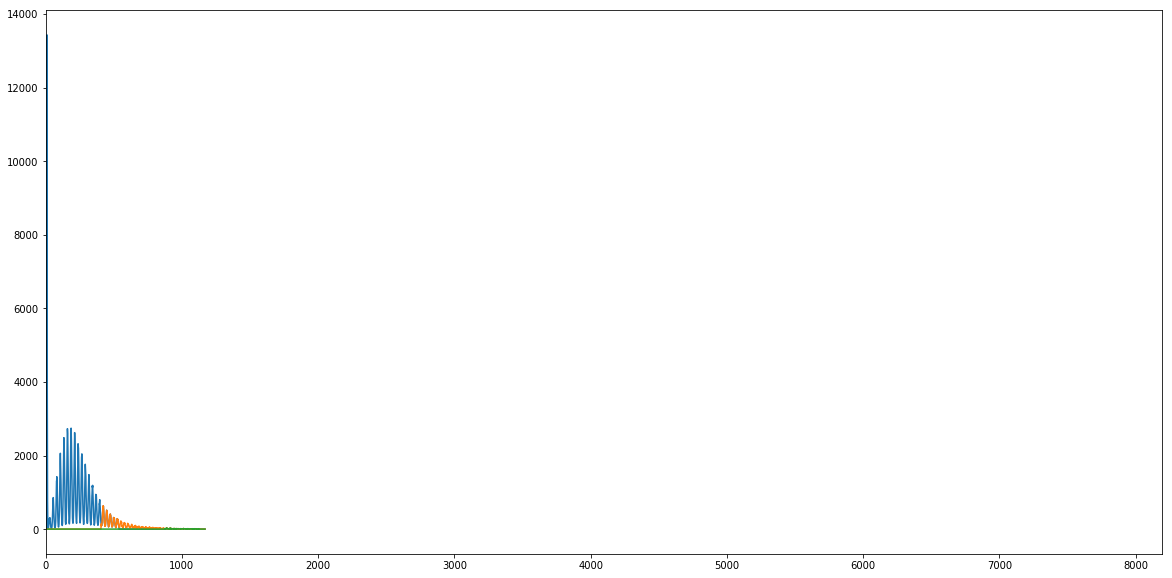

Window_15
Average Distance: 30.486486486486488
First Peak: 9
Last Peak: 1137
Total Number of Peaks: 38
[   9   55   81  107  134  160  186  212  238  264  292  342  370  395
  422  448  475  500  526  554  581  608  633  660  686  733  760  788
  814  839  864  914  944  993 1025 1069 1104 1137]
47
['Window_000', 'Window_001', 'Window_002', 'Window_003', 'Window_004', 'Window_005', 'Window_006', 'Window_007', 'Window_008', 'Window_009', 'Window_010', 'Window_011', 'Window_012', 'Window_013', 'Window_014', 'Window_015', 'Window_016', 'Window_017', 'Window_018', 'Window_019', 'Window_020', 'Window_021', 'Window_022', 'Window_023', 'Window_024', 'Window_025', 'Window_026', 'Window_027', 'Window_028', 'Window_029', 'Window_030', 'Window_031', 'Window_032', 'Window_033', 'Window_034', 'Window_035', 'Window_036', 'Window_037', 'Window_038', 'Window_039', 'Window_040', 'Window_041', 'Window_042', 'Window_043', 'Window_044', 'Window_045', 'Window_046', 'Window_047']
Window_045
Window_046
Windo

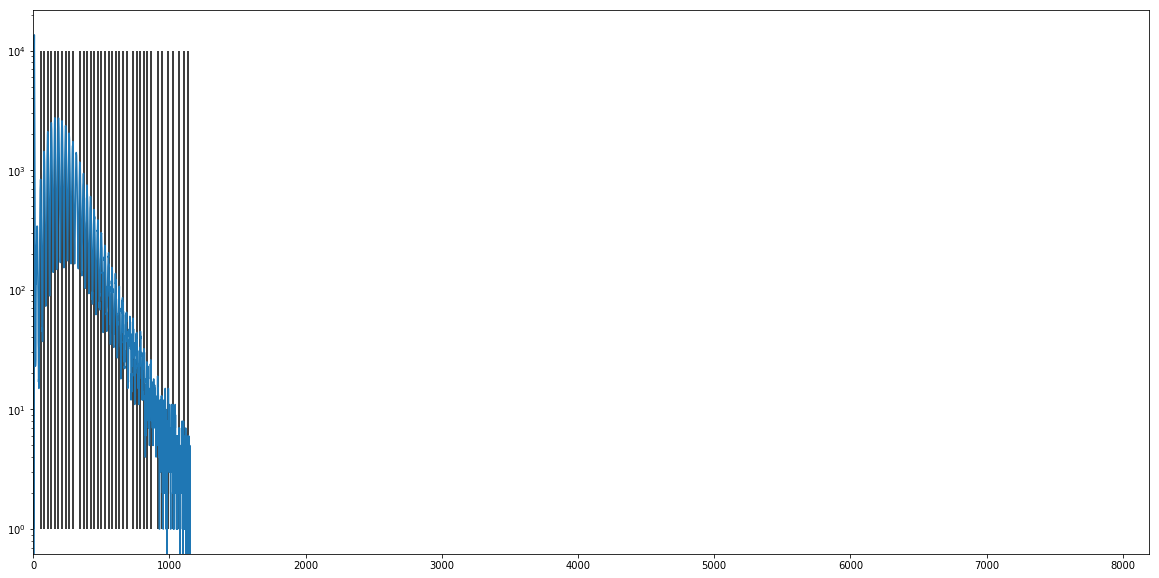

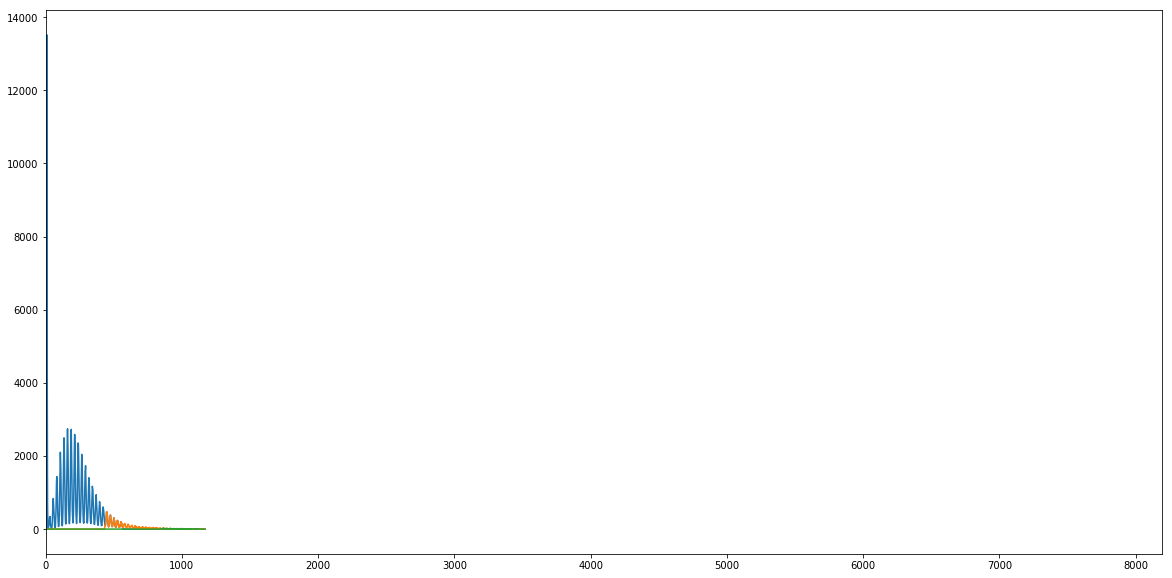

Window_16
Average Distance: 30.513513513513512
First Peak: 9
Last Peak: 1138
Total Number of Peaks: 38
[   9   54   80  107  133  159  185  211  238  264  289  315  341  368
  393  418  447  473  500  525  553  602  628  653  683  733  761  786
  813  841  869  896  943  987 1013 1053 1107 1138]
50
['Window_000', 'Window_001', 'Window_002', 'Window_003', 'Window_004', 'Window_005', 'Window_006', 'Window_007', 'Window_008', 'Window_009', 'Window_010', 'Window_011', 'Window_012', 'Window_013', 'Window_014', 'Window_015', 'Window_016', 'Window_017', 'Window_018', 'Window_019', 'Window_020', 'Window_021', 'Window_022', 'Window_023', 'Window_024', 'Window_025', 'Window_026', 'Window_027', 'Window_028', 'Window_029', 'Window_030', 'Window_031', 'Window_032', 'Window_033', 'Window_034', 'Window_035', 'Window_036', 'Window_037', 'Window_038', 'Window_039', 'Window_040', 'Window_041', 'Window_042', 'Window_043', 'Window_044', 'Window_045', 'Window_046', 'Window_047', 'Window_048', 'Window_049',

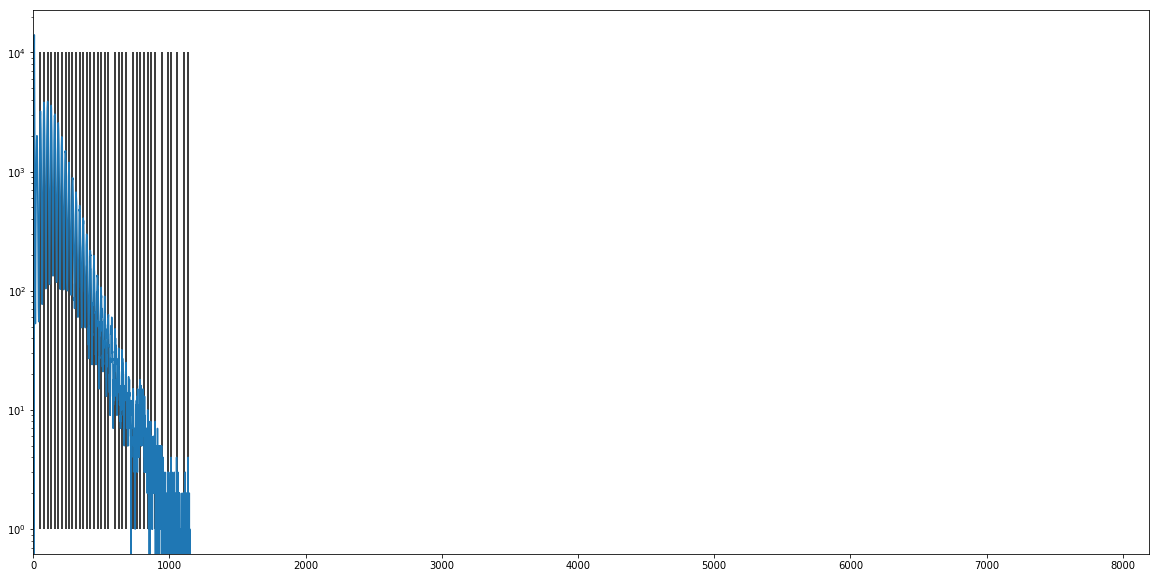

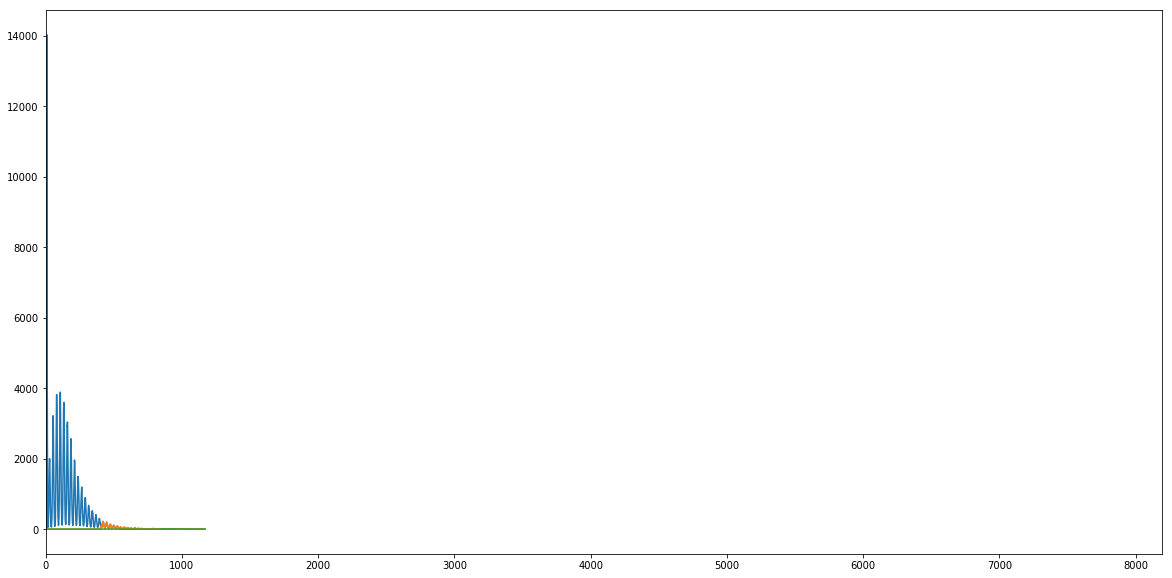

Window_17
Average Distance: 32.18518518518518
First Peak: 9
Last Peak: 878
Total Number of Peaks: 28
[  9  53  80 106 132 157 185 210 235 264 291 316 341 369 394 419 447 474
 502 533 580 621 653 720 783 814 846 878]
53
['Window_000', 'Window_001', 'Window_002', 'Window_003', 'Window_004', 'Window_005', 'Window_006', 'Window_007', 'Window_008', 'Window_009', 'Window_010', 'Window_011', 'Window_012', 'Window_013', 'Window_014', 'Window_015', 'Window_016', 'Window_017', 'Window_018', 'Window_019', 'Window_020', 'Window_021', 'Window_022', 'Window_023', 'Window_024', 'Window_025', 'Window_026', 'Window_027', 'Window_028', 'Window_029', 'Window_030', 'Window_031', 'Window_032', 'Window_033', 'Window_034', 'Window_035', 'Window_036', 'Window_037', 'Window_038', 'Window_039', 'Window_040', 'Window_041', 'Window_042', 'Window_043', 'Window_044', 'Window_045', 'Window_046', 'Window_047', 'Window_048', 'Window_049', 'Window_050', 'Window_051', 'Window_052', 'Window_053']
Window_051
Window_052
Wi

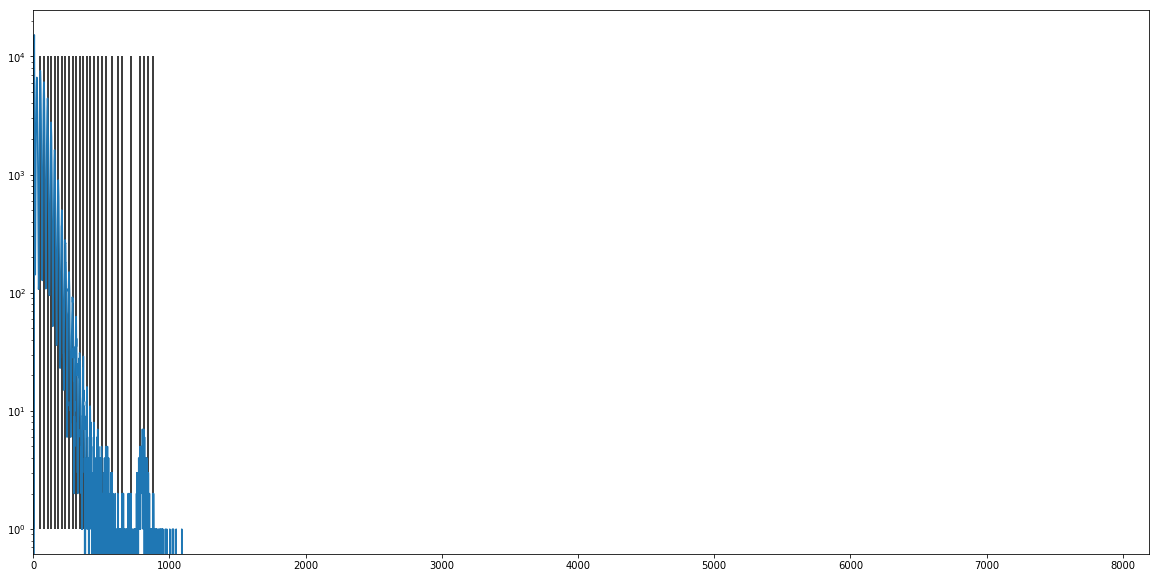

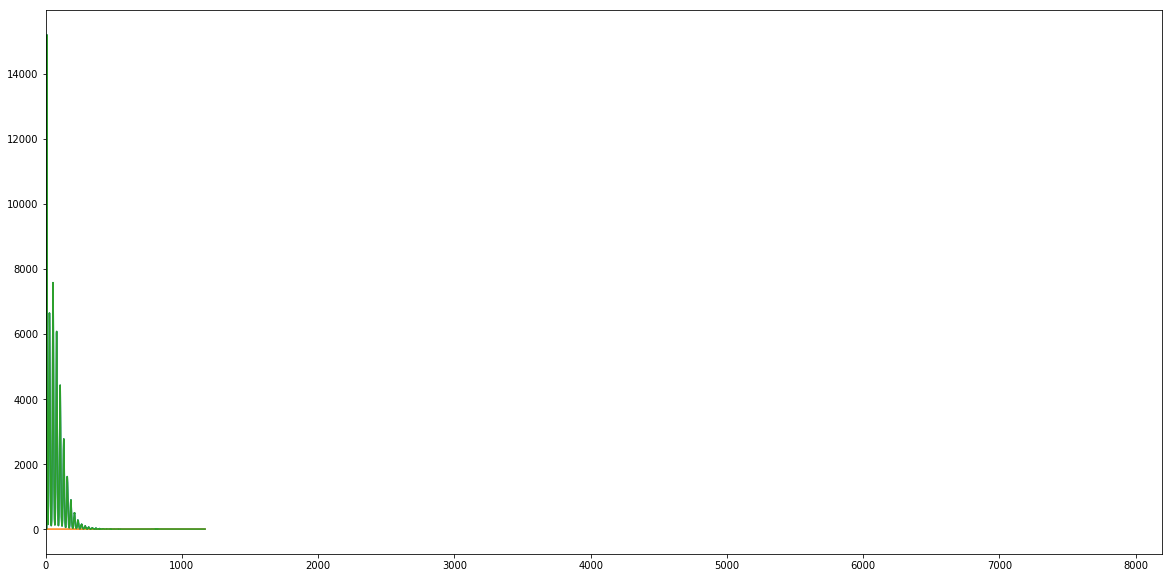

Window_18
Average Distance: 30.642857142857142
First Peak: 9
Last Peak: 867
Total Number of Peaks: 29
[  9  54  79 106 133 158 184 211 236 264 290 317 342 368 394 419 444 473
 499 546 579 606 635 662 701 767 806 834 867]
56
['Window_000', 'Window_001', 'Window_002', 'Window_003', 'Window_004', 'Window_005', 'Window_006', 'Window_007', 'Window_008', 'Window_009', 'Window_010', 'Window_011', 'Window_012', 'Window_013', 'Window_014', 'Window_015', 'Window_016', 'Window_017', 'Window_018', 'Window_019', 'Window_020', 'Window_021', 'Window_022', 'Window_023', 'Window_024', 'Window_025', 'Window_026', 'Window_027', 'Window_028', 'Window_029', 'Window_030', 'Window_031', 'Window_032', 'Window_033', 'Window_034', 'Window_035', 'Window_036', 'Window_037', 'Window_038', 'Window_039', 'Window_040', 'Window_041', 'Window_042', 'Window_043', 'Window_044', 'Window_045', 'Window_046', 'Window_047', 'Window_048', 'Window_049', 'Window_050', 'Window_051', 'Window_052', 'Window_053', 'Window_054', 'Wind

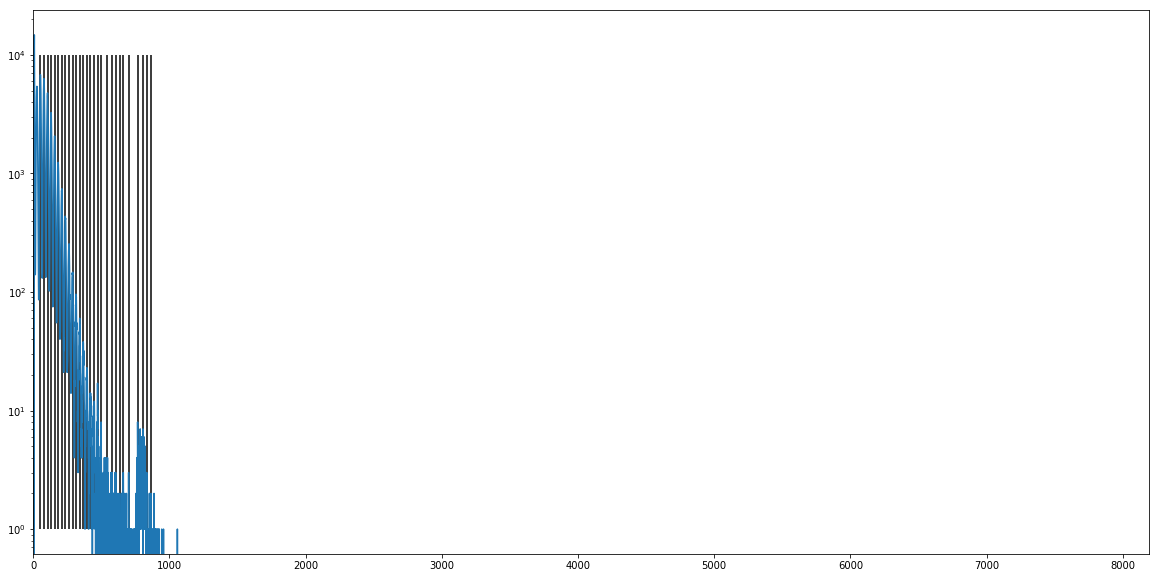

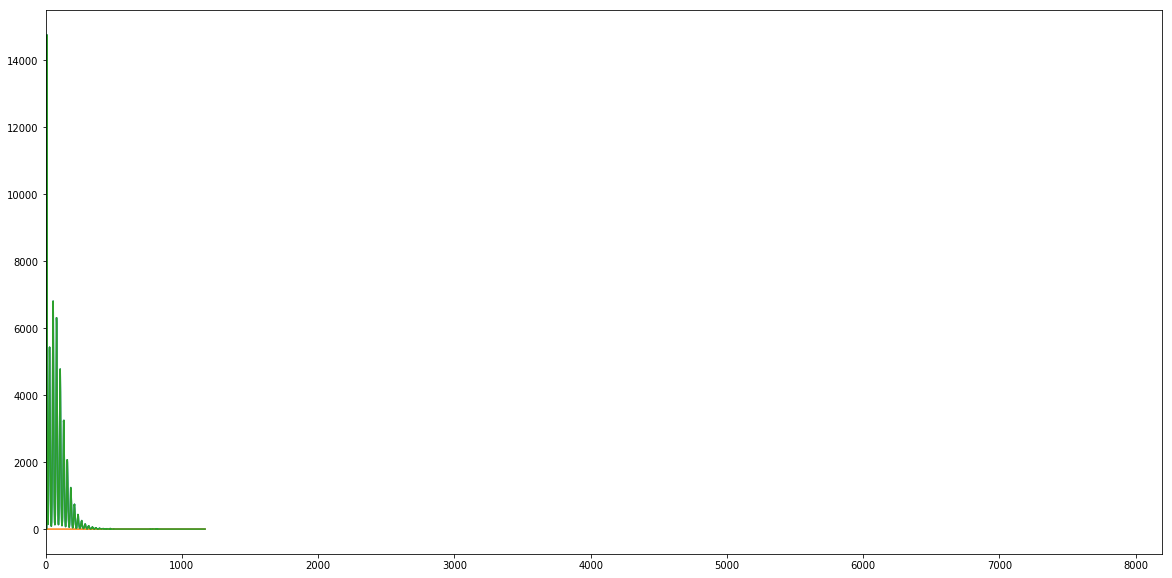

Window_19
Average Distance: 29.689655172413794
First Peak: 9
Last Peak: 870
Total Number of Peaks: 30
[  9  53  80 106 131 158 185 210 236 262 290 316 343 369 395 420 445 470
 500 525 575 622 648 680 707 732 763 809 835 870]
59
['Window_000', 'Window_001', 'Window_002', 'Window_003', 'Window_004', 'Window_005', 'Window_006', 'Window_007', 'Window_008', 'Window_009', 'Window_010', 'Window_011', 'Window_012', 'Window_013', 'Window_014', 'Window_015', 'Window_016', 'Window_017', 'Window_018', 'Window_019', 'Window_020', 'Window_021', 'Window_022', 'Window_023', 'Window_024', 'Window_025', 'Window_026', 'Window_027', 'Window_028', 'Window_029', 'Window_030', 'Window_031', 'Window_032', 'Window_033', 'Window_034', 'Window_035', 'Window_036', 'Window_037', 'Window_038', 'Window_039', 'Window_040', 'Window_041', 'Window_042', 'Window_043', 'Window_044', 'Window_045', 'Window_046', 'Window_047', 'Window_048', 'Window_049', 'Window_050', 'Window_051', 'Window_052', 'Window_053', 'Window_054', '

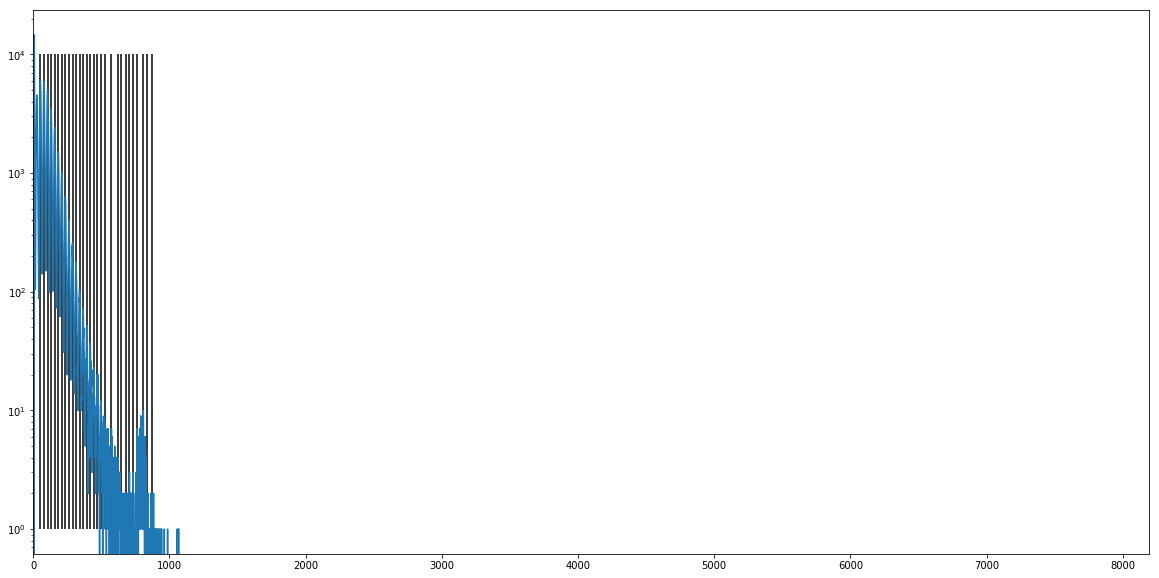

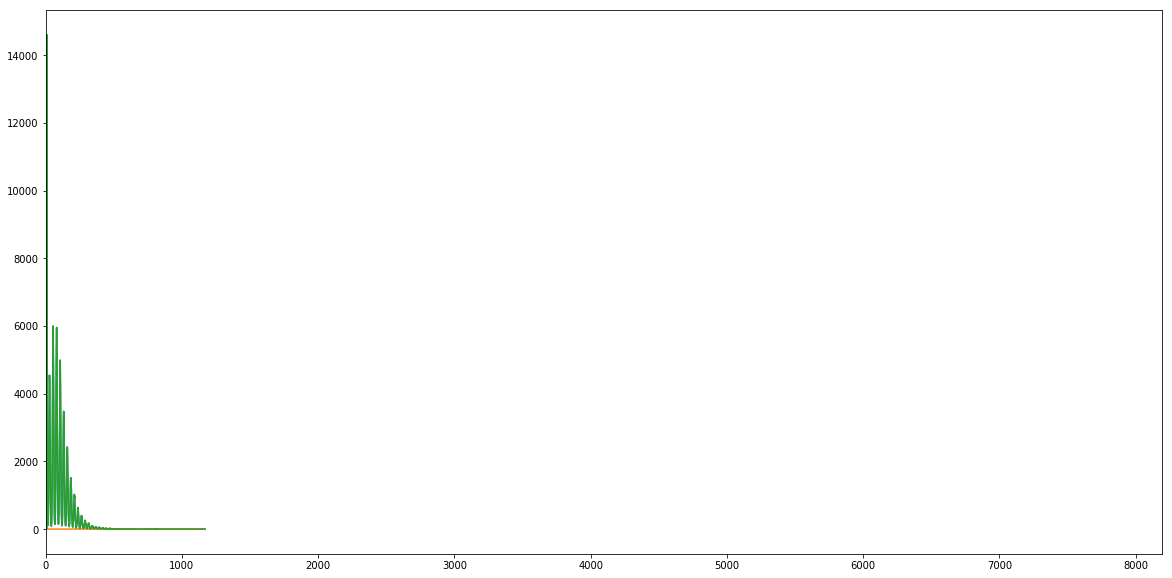

Window_20
Average Distance: 32.63333333333333
First Peak: 9
Last Peak: 988
Total Number of Peaks: 31
[  9  53  79 106 132 158 183 210 236 262 290 317 342 368 395 447 502 548
 573 622 650 676 704 737 780 808 835 863 892 923 988]
62
['Window_000', 'Window_001', 'Window_002', 'Window_003', 'Window_004', 'Window_005', 'Window_006', 'Window_007', 'Window_008', 'Window_009', 'Window_010', 'Window_011', 'Window_012', 'Window_013', 'Window_014', 'Window_015', 'Window_016', 'Window_017', 'Window_018', 'Window_019', 'Window_020', 'Window_021', 'Window_022', 'Window_023', 'Window_024', 'Window_025', 'Window_026', 'Window_027', 'Window_028', 'Window_029', 'Window_030', 'Window_031', 'Window_032', 'Window_033', 'Window_034', 'Window_035', 'Window_036', 'Window_037', 'Window_038', 'Window_039', 'Window_040', 'Window_041', 'Window_042', 'Window_043', 'Window_044', 'Window_045', 'Window_046', 'Window_047', 'Window_048', 'Window_049', 'Window_050', 'Window_051', 'Window_052', 'Window_053', 'Window_054'

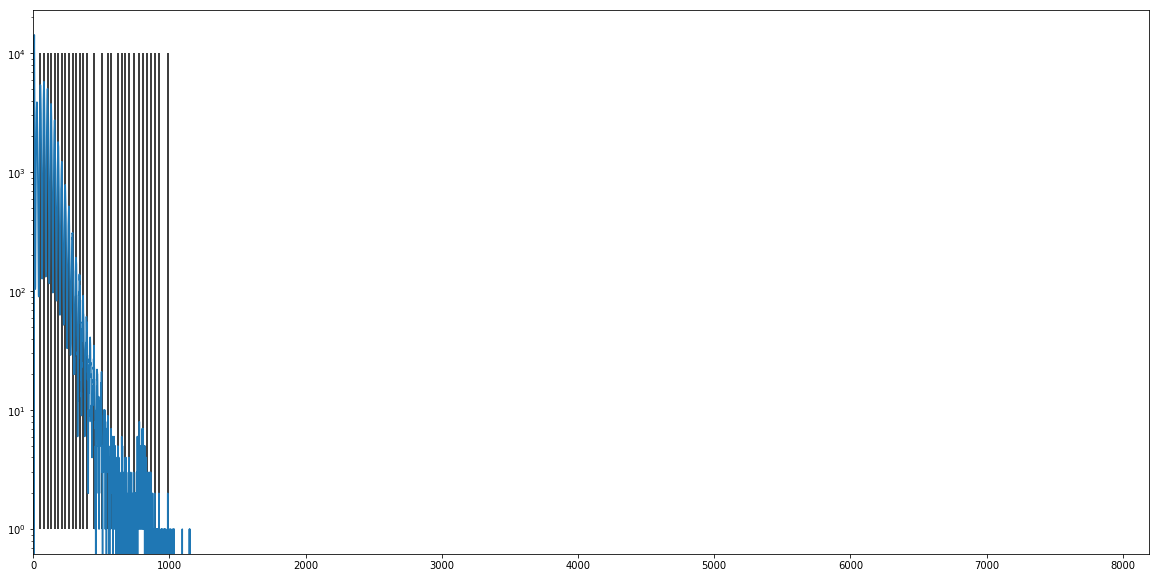

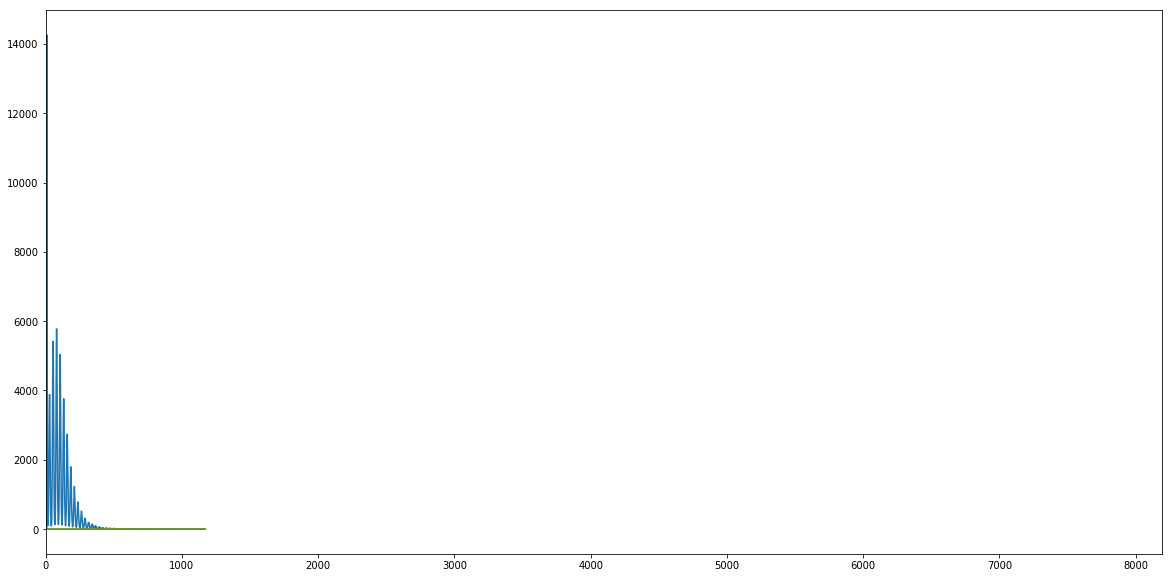

Window_21
Average Distance: 32.63333333333333
First Peak: 9
Last Peak: 988
Total Number of Peaks: 31
[  9  53  80 131 157 183 210 235 261 288 313 341 366 392 418 444 470 496
 525 574 600 646 676 731 757 784 815 856 899 926 988]
65
['Window_000', 'Window_001', 'Window_002', 'Window_003', 'Window_004', 'Window_005', 'Window_006', 'Window_007', 'Window_008', 'Window_009', 'Window_010', 'Window_011', 'Window_012', 'Window_013', 'Window_014', 'Window_015', 'Window_016', 'Window_017', 'Window_018', 'Window_019', 'Window_020', 'Window_021', 'Window_022', 'Window_023', 'Window_024', 'Window_025', 'Window_026', 'Window_027', 'Window_028', 'Window_029', 'Window_030', 'Window_031', 'Window_032', 'Window_033', 'Window_034', 'Window_035', 'Window_036', 'Window_037', 'Window_038', 'Window_039', 'Window_040', 'Window_041', 'Window_042', 'Window_043', 'Window_044', 'Window_045', 'Window_046', 'Window_047', 'Window_048', 'Window_049', 'Window_050', 'Window_051', 'Window_052', 'Window_053', 'Window_054'

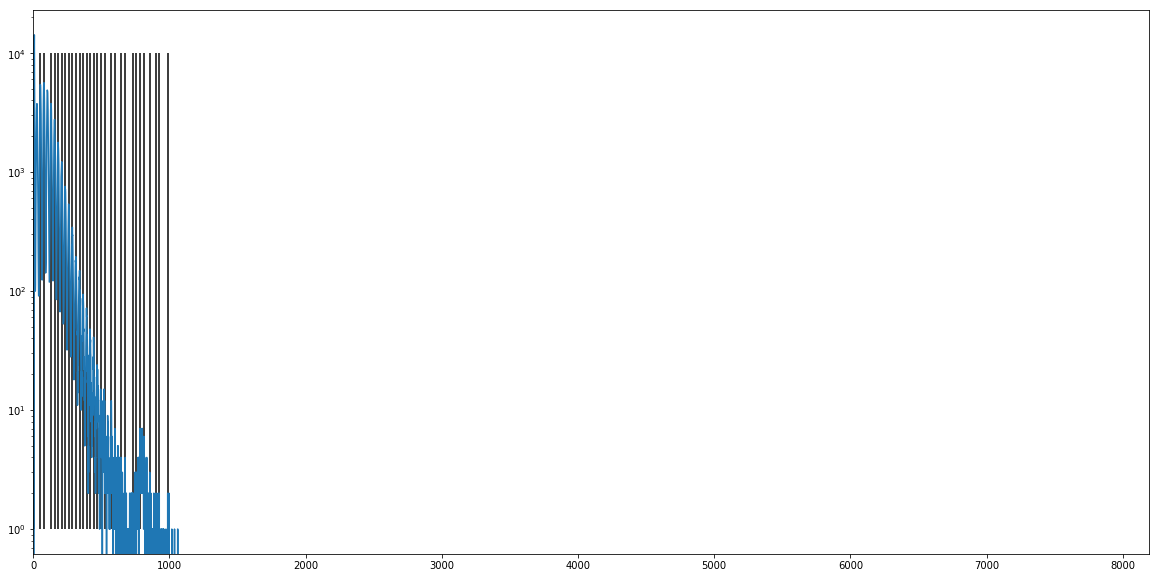

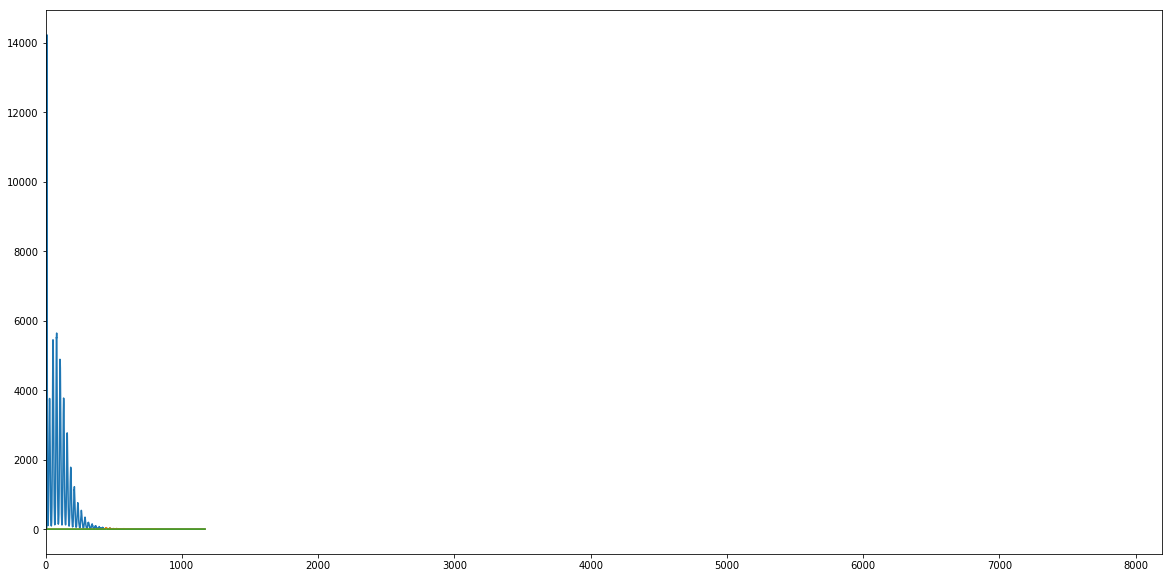

Window_22
Average Distance: 32.96666666666667
First Peak: 9
Last Peak: 998
Total Number of Peaks: 31
[  9  53  79 105 131 157 183 209 236 262 287 314 340 367 393 421 468 518
 546 573 599 625 656 706 732 762 797 827 857 898 998]
68
['Window_000', 'Window_001', 'Window_002', 'Window_003', 'Window_004', 'Window_005', 'Window_006', 'Window_007', 'Window_008', 'Window_009', 'Window_010', 'Window_011', 'Window_012', 'Window_013', 'Window_014', 'Window_015', 'Window_016', 'Window_017', 'Window_018', 'Window_019', 'Window_020', 'Window_021', 'Window_022', 'Window_023', 'Window_024', 'Window_025', 'Window_026', 'Window_027', 'Window_028', 'Window_029', 'Window_030', 'Window_031', 'Window_032', 'Window_033', 'Window_034', 'Window_035', 'Window_036', 'Window_037', 'Window_038', 'Window_039', 'Window_040', 'Window_041', 'Window_042', 'Window_043', 'Window_044', 'Window_045', 'Window_046', 'Window_047', 'Window_048', 'Window_049', 'Window_050', 'Window_051', 'Window_052', 'Window_053', 'Window_054'

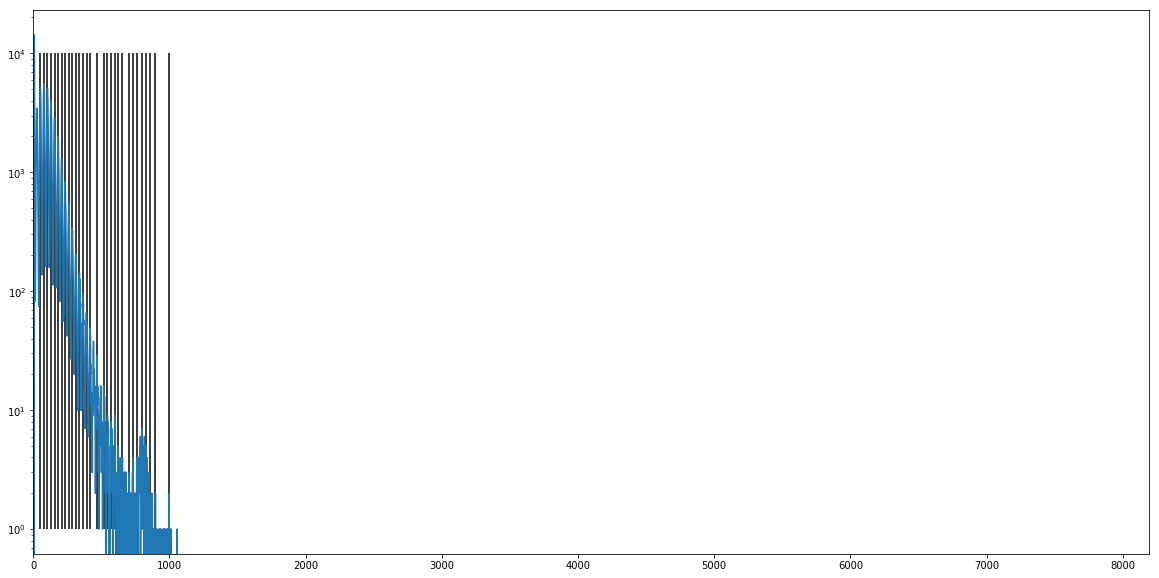

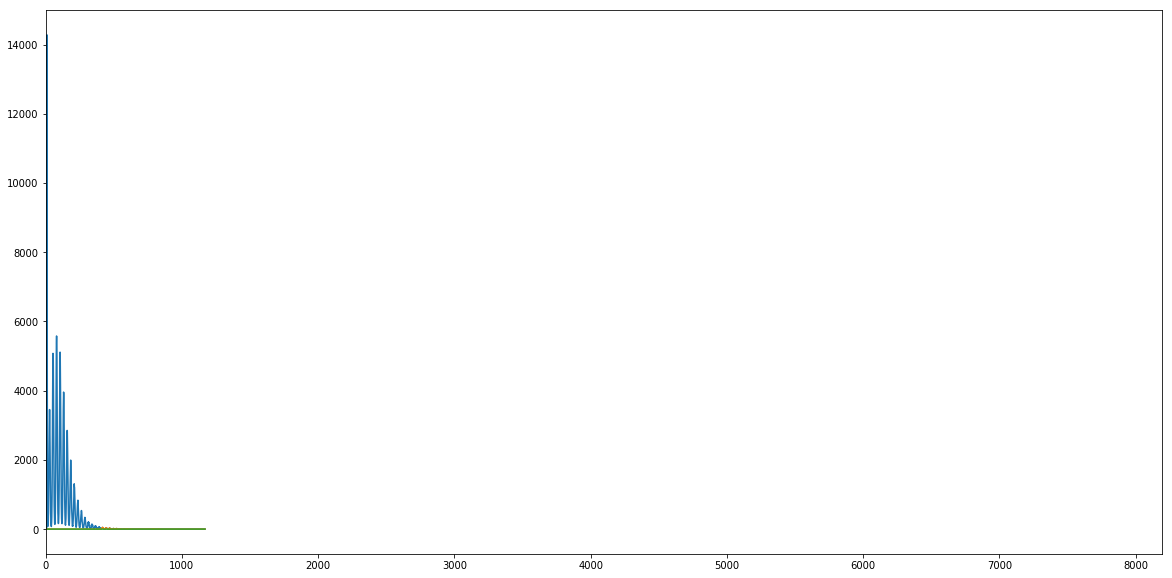

Window_23
Average Distance: 31.466666666666665
First Peak: 9
Last Peak: 953
Total Number of Peaks: 31
[  9  54  79 106 132 157 182 209 235 261 287 312 340 365 393 419 447 491
 522 549 597 646 681 721 751 785 825 854 900 927 953]
71
['Window_000', 'Window_001', 'Window_002', 'Window_003', 'Window_004', 'Window_005', 'Window_006', 'Window_007', 'Window_008', 'Window_009', 'Window_010', 'Window_011', 'Window_012', 'Window_013', 'Window_014', 'Window_015', 'Window_016', 'Window_017', 'Window_018', 'Window_019', 'Window_020', 'Window_021', 'Window_022', 'Window_023', 'Window_024', 'Window_025', 'Window_026', 'Window_027', 'Window_028', 'Window_029', 'Window_030', 'Window_031', 'Window_032', 'Window_033', 'Window_034', 'Window_035', 'Window_036', 'Window_037', 'Window_038', 'Window_039', 'Window_040', 'Window_041', 'Window_042', 'Window_043', 'Window_044', 'Window_045', 'Window_046', 'Window_047', 'Window_048', 'Window_049', 'Window_050', 'Window_051', 'Window_052', 'Window_053', 'Window_054

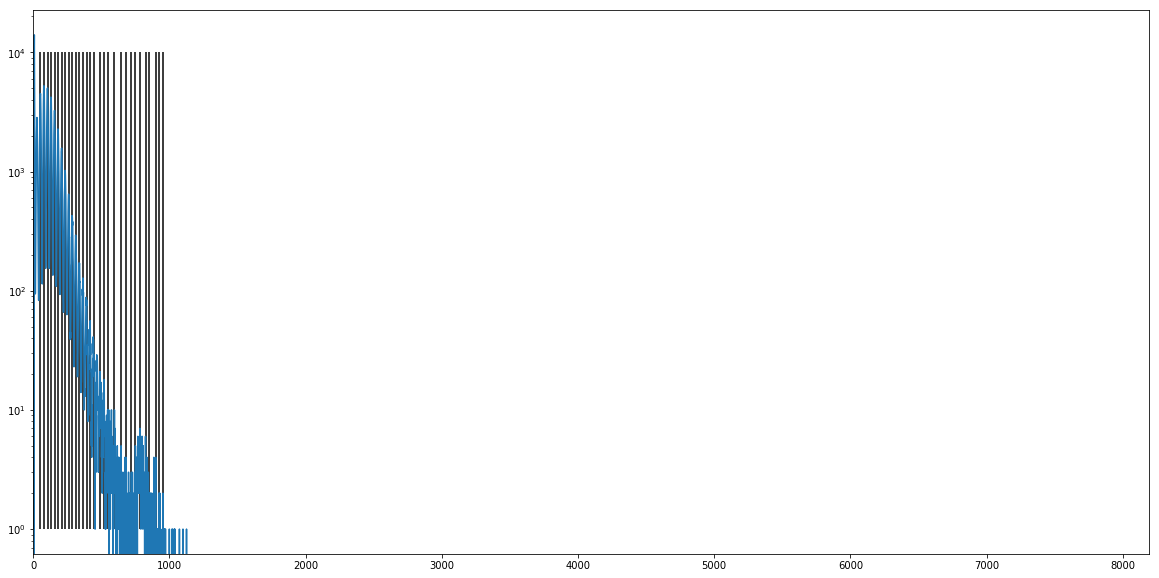

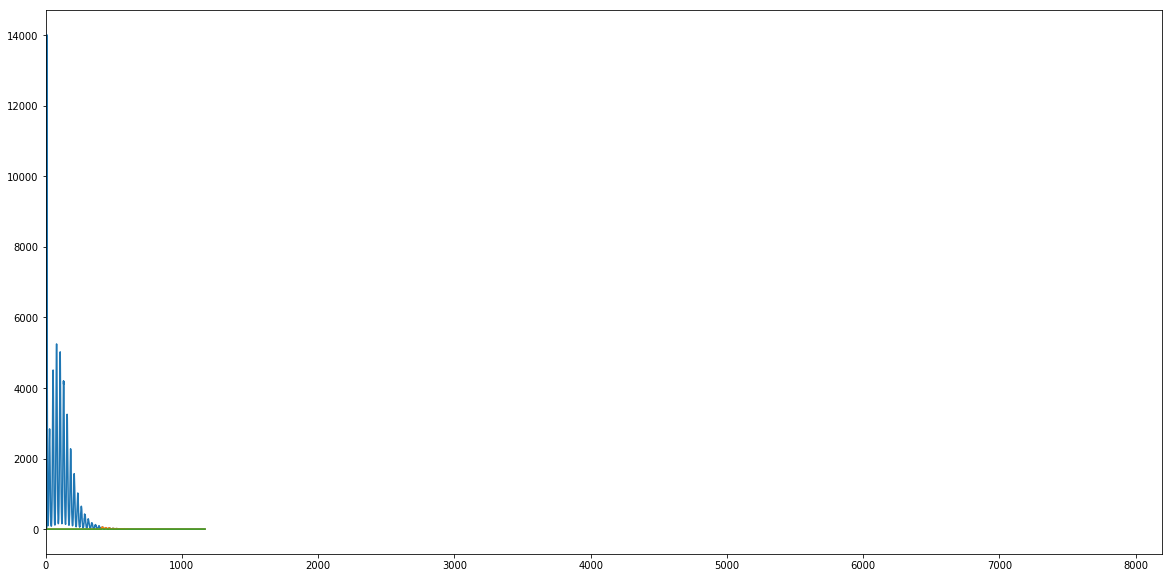

Window_24
Average Distance: 32.84848484848485
First Peak: 9
Last Peak: 1093
Total Number of Peaks: 34
[   9   54   79  105  131  156  182  209  234  260  286  313  340  365
  392  417  444  493  521  570  596  623  674  706  751  780  808  834
  872  902  932  958  987 1093]
74
['Window_000', 'Window_001', 'Window_002', 'Window_003', 'Window_004', 'Window_005', 'Window_006', 'Window_007', 'Window_008', 'Window_009', 'Window_010', 'Window_011', 'Window_012', 'Window_013', 'Window_014', 'Window_015', 'Window_016', 'Window_017', 'Window_018', 'Window_019', 'Window_020', 'Window_021', 'Window_022', 'Window_023', 'Window_024', 'Window_025', 'Window_026', 'Window_027', 'Window_028', 'Window_029', 'Window_030', 'Window_031', 'Window_032', 'Window_033', 'Window_034', 'Window_035', 'Window_036', 'Window_037', 'Window_038', 'Window_039', 'Window_040', 'Window_041', 'Window_042', 'Window_043', 'Window_044', 'Window_045', 'Window_046', 'Window_047', 'Window_048', 'Window_049', 'Window_050', 'Windo

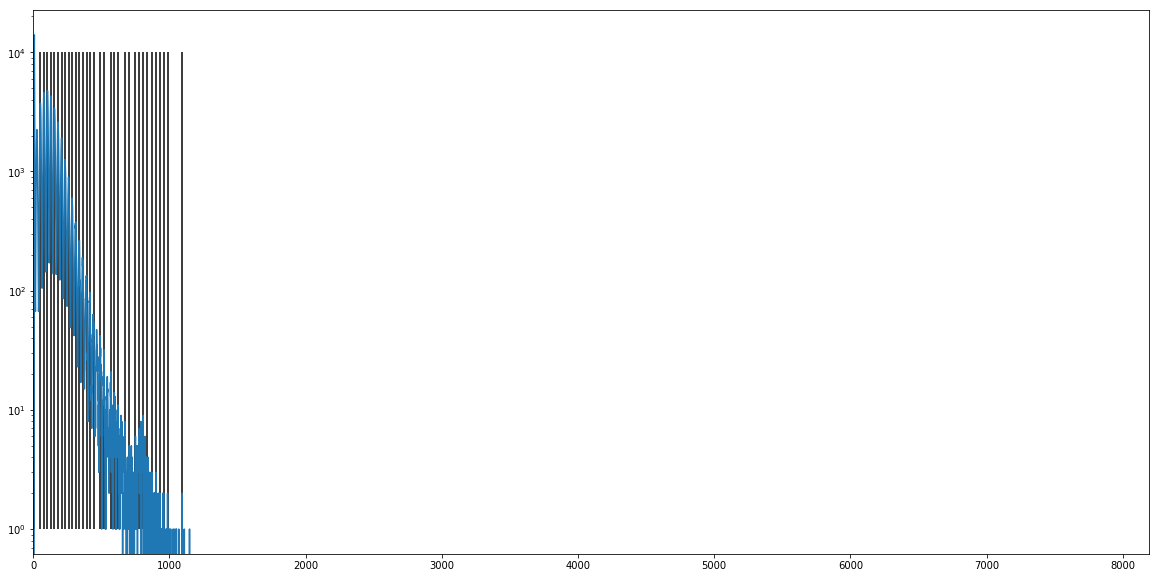

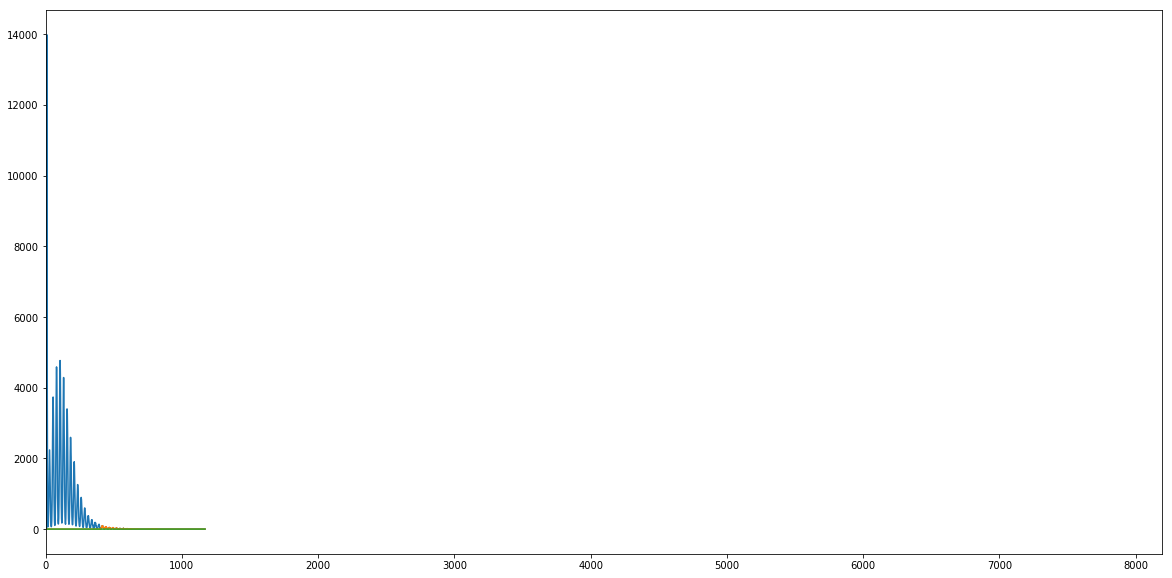

Window_25
Average Distance: 30.939393939393938
First Peak: 9
Last Peak: 1030
Total Number of Peaks: 34
[   9   53   79  105  131  156  182  208  234  260  285  311  336  362
  388  414  442  467  513  543  570  595  621  674  702  749  777  805
  833  875  915  945  976 1030]
77
['Window_000', 'Window_001', 'Window_002', 'Window_003', 'Window_004', 'Window_005', 'Window_006', 'Window_007', 'Window_008', 'Window_009', 'Window_010', 'Window_011', 'Window_012', 'Window_013', 'Window_014', 'Window_015', 'Window_016', 'Window_017', 'Window_018', 'Window_019', 'Window_020', 'Window_021', 'Window_022', 'Window_023', 'Window_024', 'Window_025', 'Window_026', 'Window_027', 'Window_028', 'Window_029', 'Window_030', 'Window_031', 'Window_032', 'Window_033', 'Window_034', 'Window_035', 'Window_036', 'Window_037', 'Window_038', 'Window_039', 'Window_040', 'Window_041', 'Window_042', 'Window_043', 'Window_044', 'Window_045', 'Window_046', 'Window_047', 'Window_048', 'Window_049', 'Window_050', 'Wind

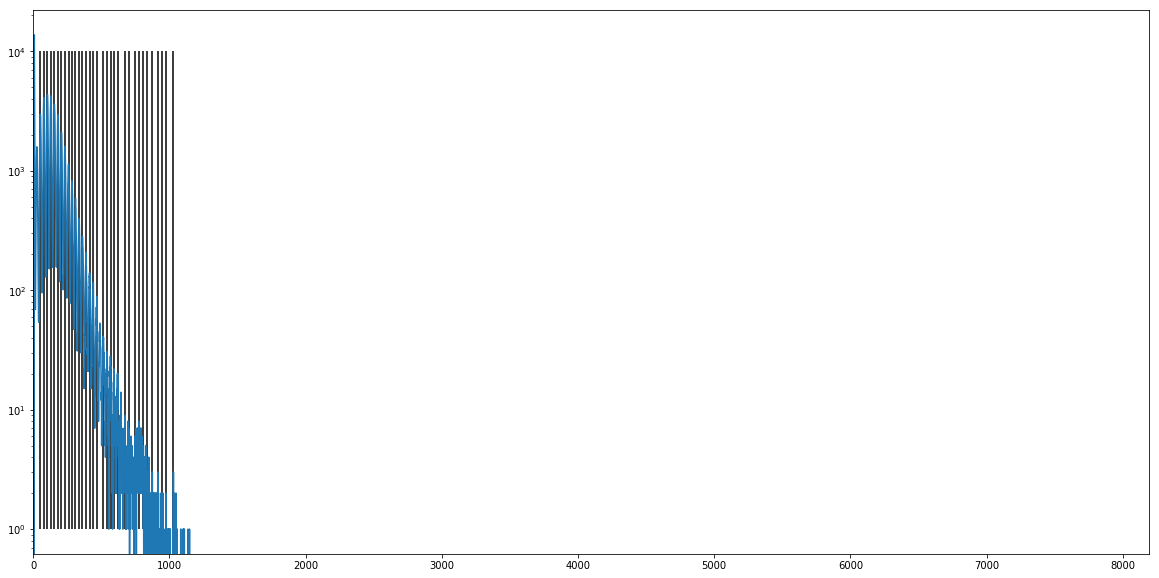

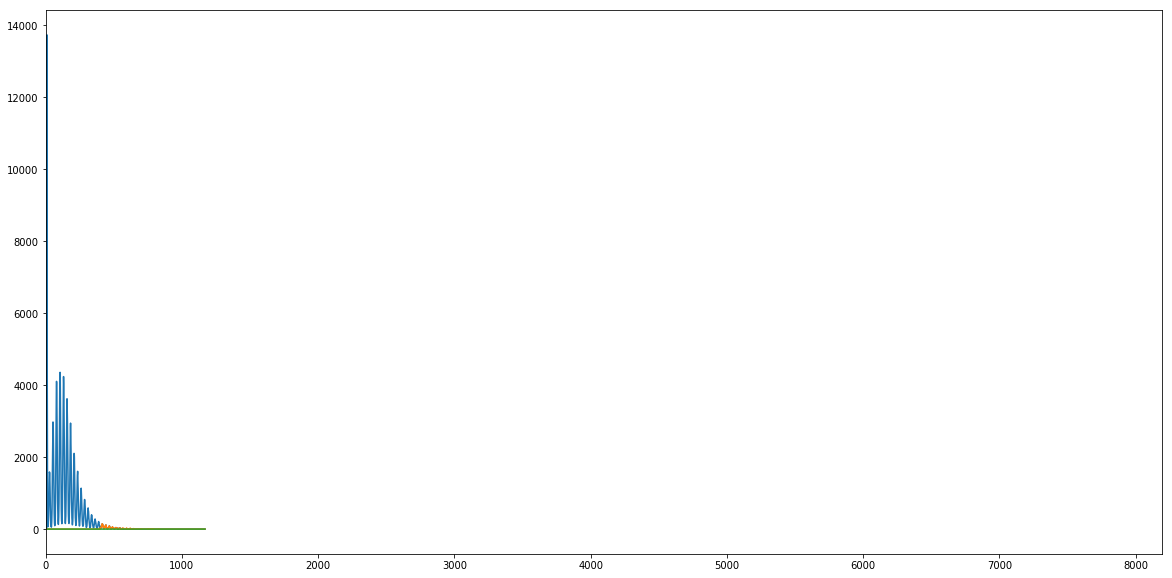

Window_26
Average Distance: 32.48571428571429
First Peak: 9
Last Peak: 1146
Total Number of Peaks: 36
[   9   53   79  105  130  156  183  233  258  285  311  336  362  388
  413  440  465  491  517  544  570  619  646  671  696  726  772  799
  828  855  901  948  990 1049 1085 1146]
80
['Window_000', 'Window_001', 'Window_002', 'Window_003', 'Window_004', 'Window_005', 'Window_006', 'Window_007', 'Window_008', 'Window_009', 'Window_010', 'Window_011', 'Window_012', 'Window_013', 'Window_014', 'Window_015', 'Window_016', 'Window_017', 'Window_018', 'Window_019', 'Window_020', 'Window_021', 'Window_022', 'Window_023', 'Window_024', 'Window_025', 'Window_026', 'Window_027', 'Window_028', 'Window_029', 'Window_030', 'Window_031', 'Window_032', 'Window_033', 'Window_034', 'Window_035', 'Window_036', 'Window_037', 'Window_038', 'Window_039', 'Window_040', 'Window_041', 'Window_042', 'Window_043', 'Window_044', 'Window_045', 'Window_046', 'Window_047', 'Window_048', 'Window_049', 'Window_05

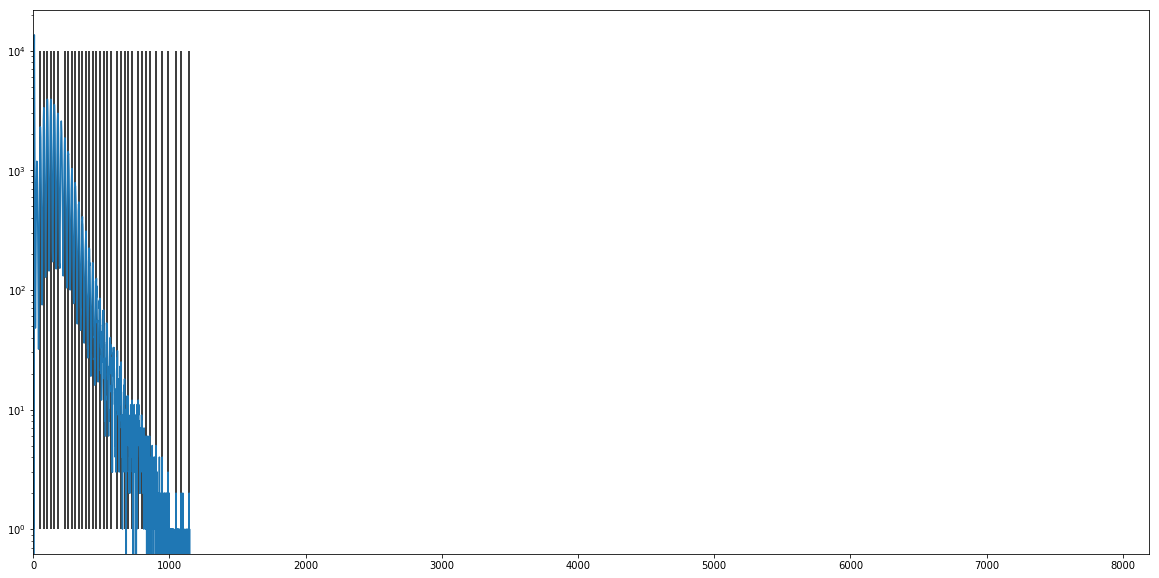

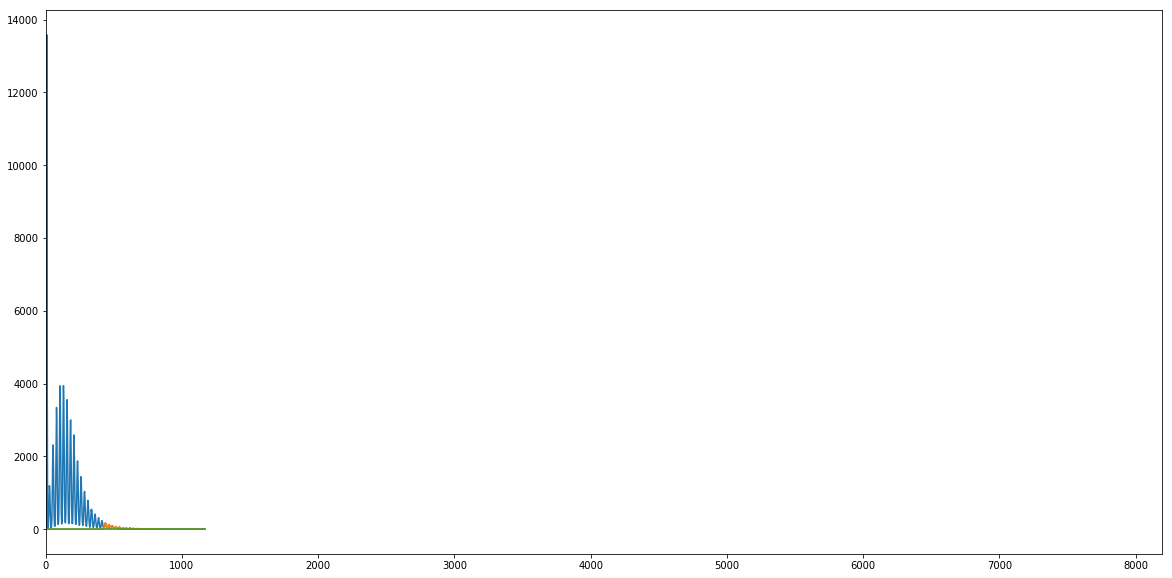

Window_27
Average Distance: 31.8
First Peak: 9
Last Peak: 1122
Total Number of Peaks: 36
[   9   53   79  104  130  155  180  206  233  258  283  308  335  360
  389  440  490  516  541  567  614  642  689  714  741  767  816  841
  870  921  950  988 1020 1047 1072 1122]
83
['Window_000', 'Window_001', 'Window_002', 'Window_003', 'Window_004', 'Window_005', 'Window_006', 'Window_007', 'Window_008', 'Window_009', 'Window_010', 'Window_011', 'Window_012', 'Window_013', 'Window_014', 'Window_015', 'Window_016', 'Window_017', 'Window_018', 'Window_019', 'Window_020', 'Window_021', 'Window_022', 'Window_023', 'Window_024', 'Window_025', 'Window_026', 'Window_027', 'Window_028', 'Window_029', 'Window_030', 'Window_031', 'Window_032', 'Window_033', 'Window_034', 'Window_035', 'Window_036', 'Window_037', 'Window_038', 'Window_039', 'Window_040', 'Window_041', 'Window_042', 'Window_043', 'Window_044', 'Window_045', 'Window_046', 'Window_047', 'Window_048', 'Window_049', 'Window_050', 'Window_0

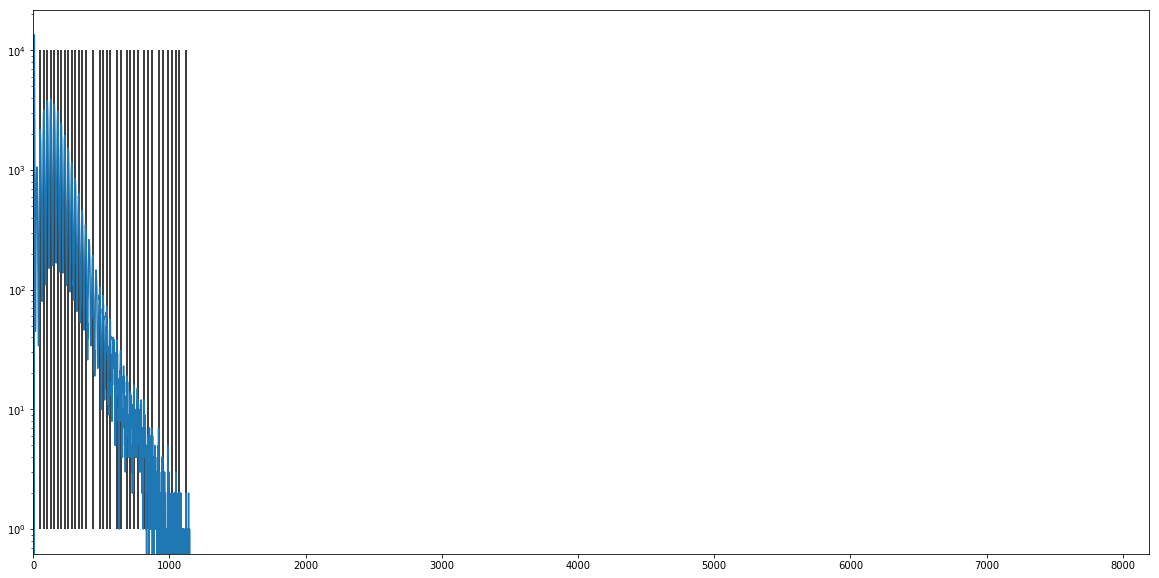

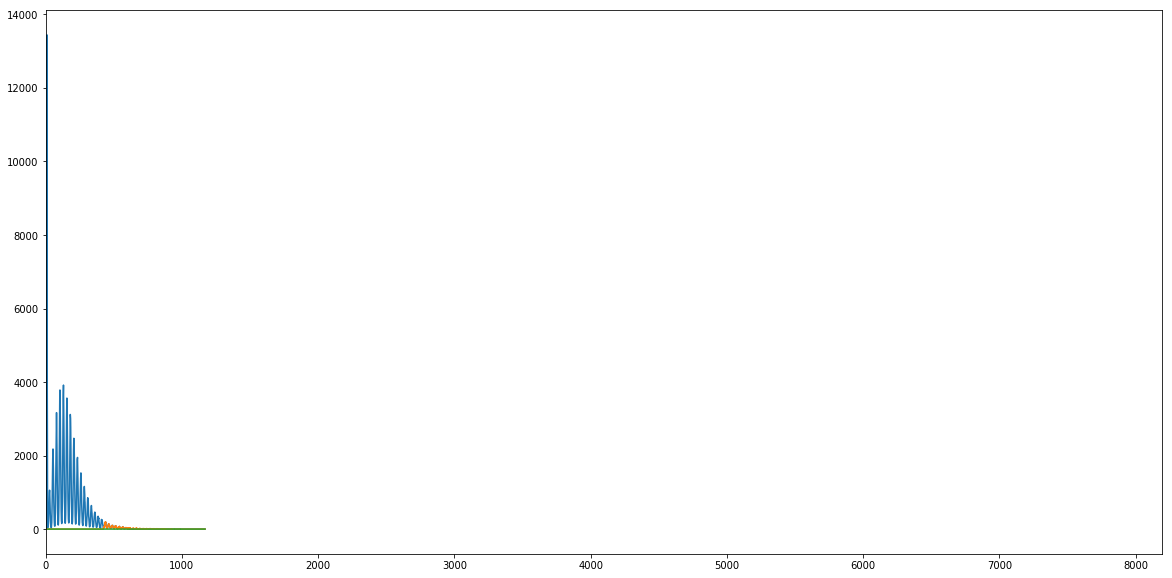

Window_28
Average Distance: 31.63888888888889
First Peak: 9
Last Peak: 1148
Total Number of Peaks: 37
[   9   53   78  104  129  155  180  206  232  257  282  307  334  361
  388  436  463  515  563  589  614  642  690  715  742  768  793  822
  847  890  917  966  992 1021 1065 1122 1148]
86
['Window_000', 'Window_001', 'Window_002', 'Window_003', 'Window_004', 'Window_005', 'Window_006', 'Window_007', 'Window_008', 'Window_009', 'Window_010', 'Window_011', 'Window_012', 'Window_013', 'Window_014', 'Window_015', 'Window_016', 'Window_017', 'Window_018', 'Window_019', 'Window_020', 'Window_021', 'Window_022', 'Window_023', 'Window_024', 'Window_025', 'Window_026', 'Window_027', 'Window_028', 'Window_029', 'Window_030', 'Window_031', 'Window_032', 'Window_033', 'Window_034', 'Window_035', 'Window_036', 'Window_037', 'Window_038', 'Window_039', 'Window_040', 'Window_041', 'Window_042', 'Window_043', 'Window_044', 'Window_045', 'Window_046', 'Window_047', 'Window_048', 'Window_049', 'Wind

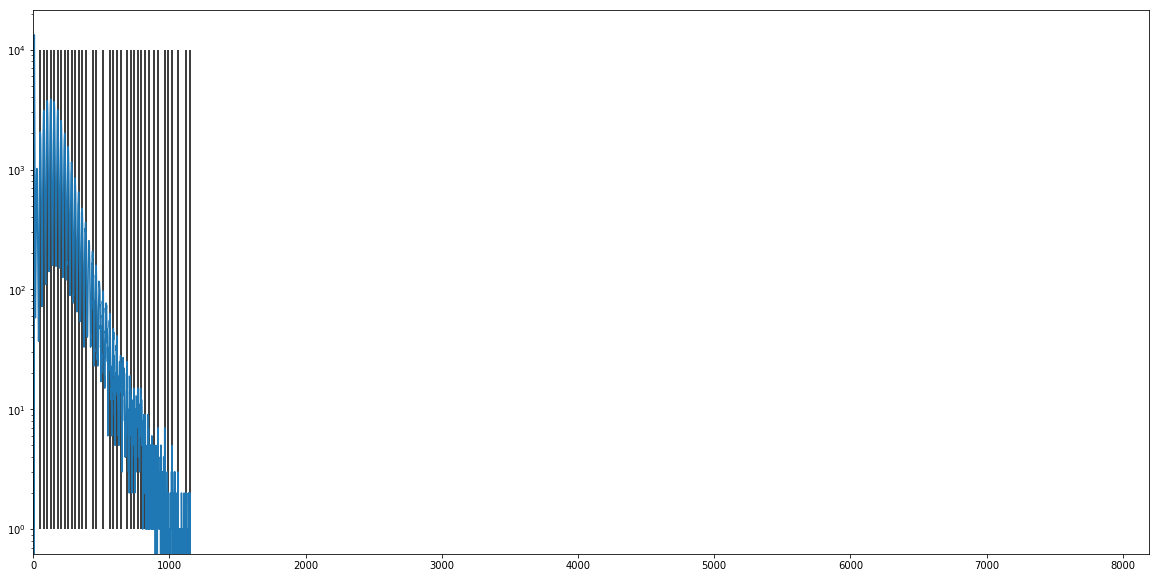

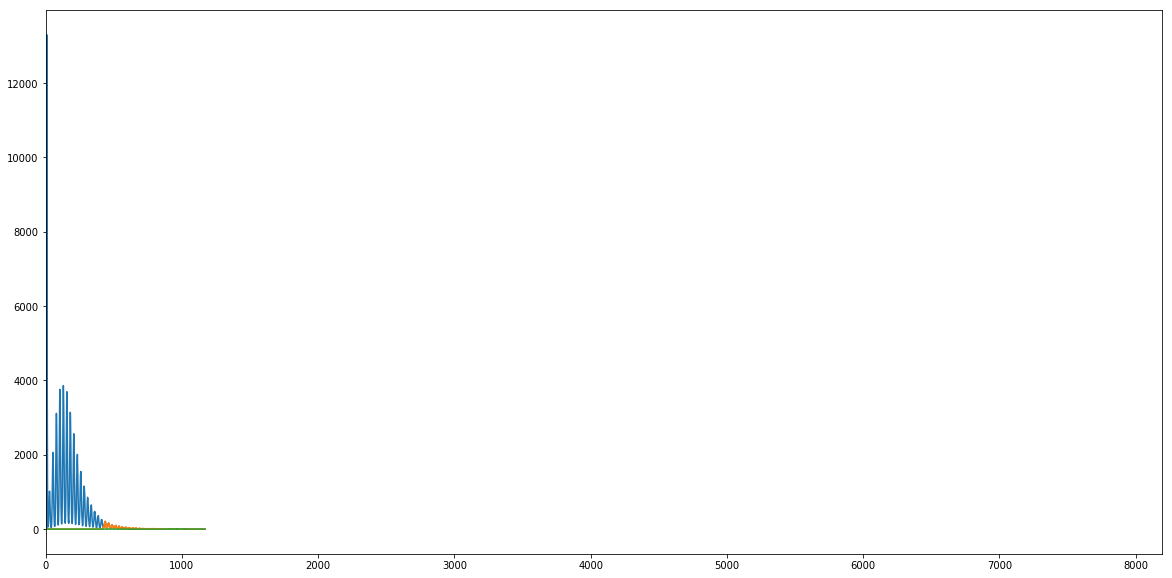

Window_29
Average Distance: 33.78787878787879
First Peak: 9
Last Peak: 1124
Total Number of Peaks: 34
[   9   52   78  104  129  155  205  231  256  281  307  334  383  409
  435  487  533  561  588  615  662  712  760  810  847  886  912  938
  963  989 1015 1061 1088 1124]
89
['Window_000', 'Window_001', 'Window_002', 'Window_003', 'Window_004', 'Window_005', 'Window_006', 'Window_007', 'Window_008', 'Window_009', 'Window_010', 'Window_011', 'Window_012', 'Window_013', 'Window_014', 'Window_015', 'Window_016', 'Window_017', 'Window_018', 'Window_019', 'Window_020', 'Window_021', 'Window_022', 'Window_023', 'Window_024', 'Window_025', 'Window_026', 'Window_027', 'Window_028', 'Window_029', 'Window_030', 'Window_031', 'Window_032', 'Window_033', 'Window_034', 'Window_035', 'Window_036', 'Window_037', 'Window_038', 'Window_039', 'Window_040', 'Window_041', 'Window_042', 'Window_043', 'Window_044', 'Window_045', 'Window_046', 'Window_047', 'Window_048', 'Window_049', 'Window_050', 'Windo

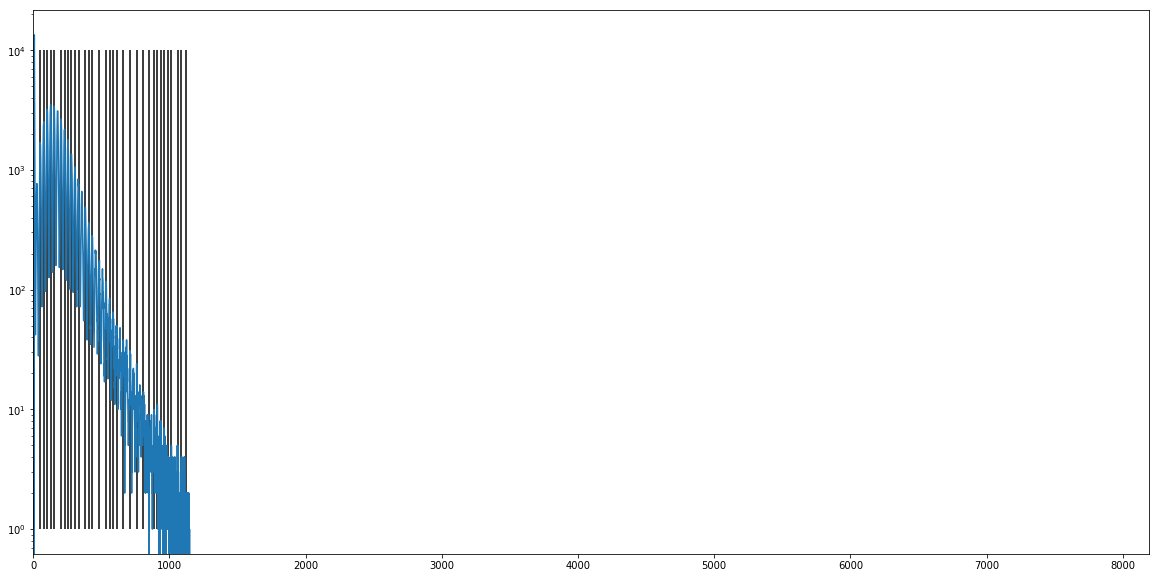

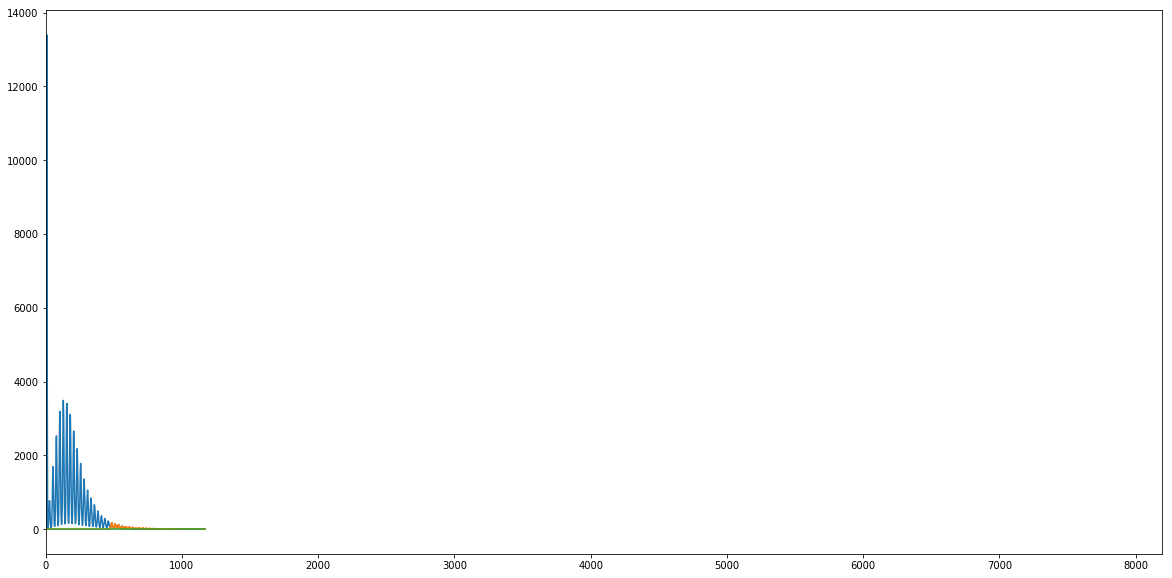

Window_30
Average Distance: 32.73529411764706
First Peak: 9
Last Peak: 1122
Total Number of Peaks: 35
[   9   52   77  103  128  153  179  205  230  281  307  333  381  407
  432  458  509  535  560  585  611  637  685  734  773  804  844  872
  900  934  962  990 1034 1067 1122]
92
['Window_000', 'Window_001', 'Window_002', 'Window_003', 'Window_004', 'Window_005', 'Window_006', 'Window_007', 'Window_008', 'Window_009', 'Window_010', 'Window_011', 'Window_012', 'Window_013', 'Window_014', 'Window_015', 'Window_016', 'Window_017', 'Window_018', 'Window_019', 'Window_020', 'Window_021', 'Window_022', 'Window_023', 'Window_024', 'Window_025', 'Window_026', 'Window_027', 'Window_028', 'Window_029', 'Window_030', 'Window_031', 'Window_032', 'Window_033', 'Window_034', 'Window_035', 'Window_036', 'Window_037', 'Window_038', 'Window_039', 'Window_040', 'Window_041', 'Window_042', 'Window_043', 'Window_044', 'Window_045', 'Window_046', 'Window_047', 'Window_048', 'Window_049', 'Window_050', '

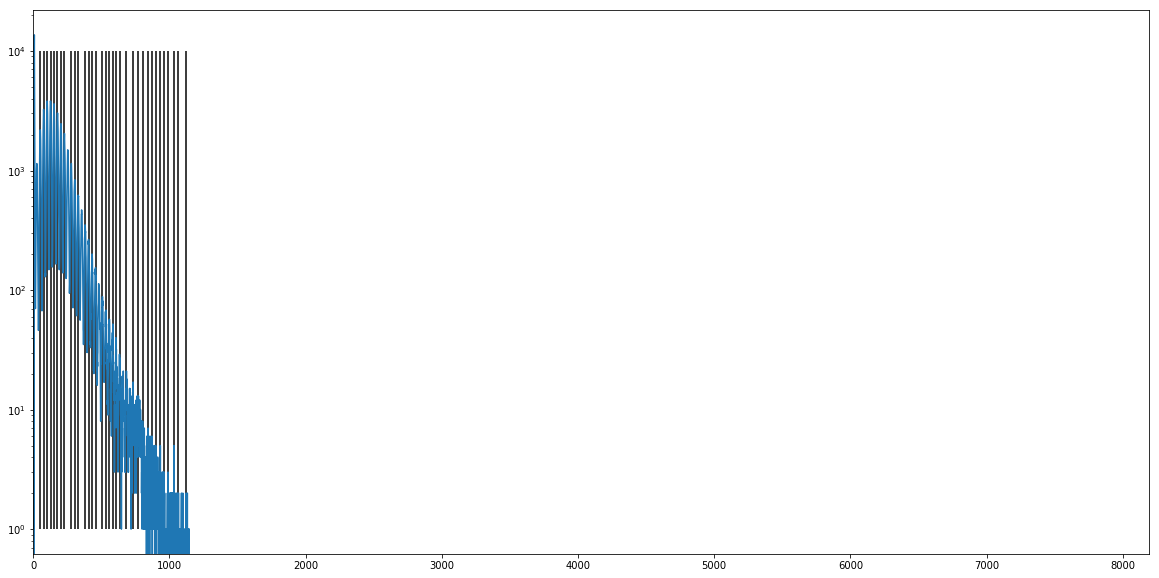

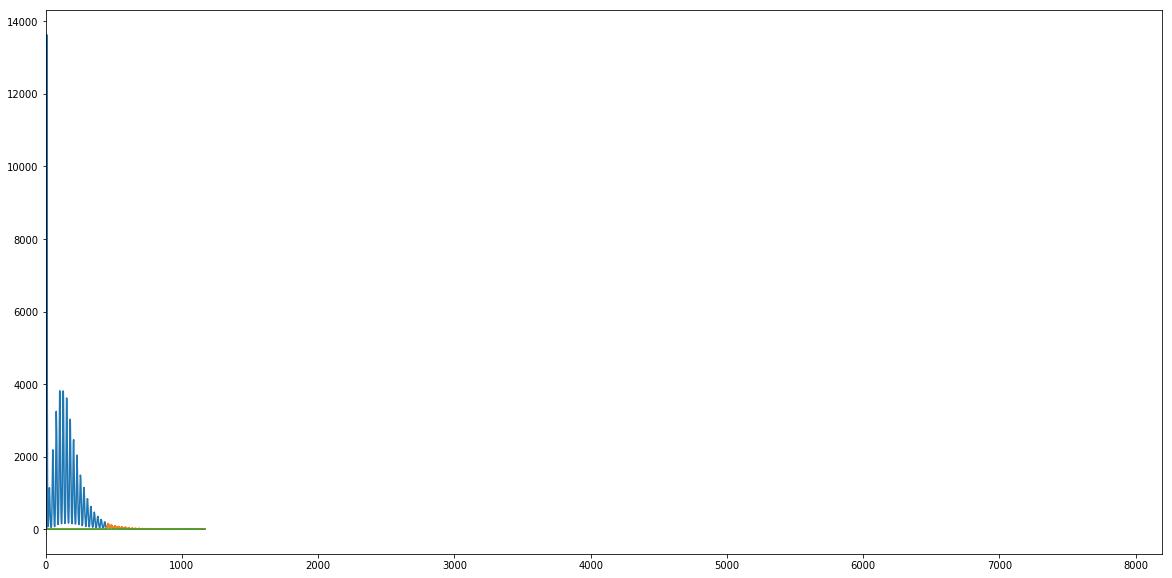

Window_31
Average Distance: 34.13793103448276
First Peak: 9
Last Peak: 999
Total Number of Peaks: 30
[  9  52  77 102 127 153 178 203 229 255 281 330 356 404 432 459 510 555
 580 605 631 659 709 755 787 832 878 911 956 999]
95
['Window_000', 'Window_001', 'Window_002', 'Window_003', 'Window_004', 'Window_005', 'Window_006', 'Window_007', 'Window_008', 'Window_009', 'Window_010', 'Window_011', 'Window_012', 'Window_013', 'Window_014', 'Window_015', 'Window_016', 'Window_017', 'Window_018', 'Window_019', 'Window_020', 'Window_021', 'Window_022', 'Window_023', 'Window_024', 'Window_025', 'Window_026', 'Window_027', 'Window_028', 'Window_029', 'Window_030', 'Window_031', 'Window_032', 'Window_033', 'Window_034', 'Window_035', 'Window_036', 'Window_037', 'Window_038', 'Window_039', 'Window_040', 'Window_041', 'Window_042', 'Window_043', 'Window_044', 'Window_045', 'Window_046', 'Window_047', 'Window_048', 'Window_049', 'Window_050', 'Window_051', 'Window_052', 'Window_053', 'Window_054', 'W

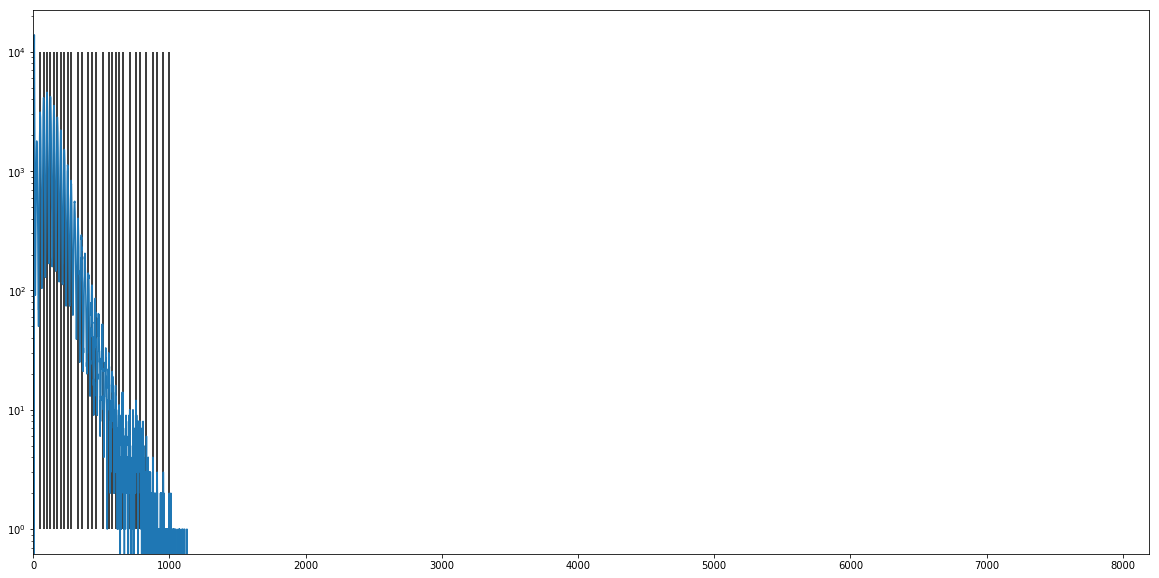

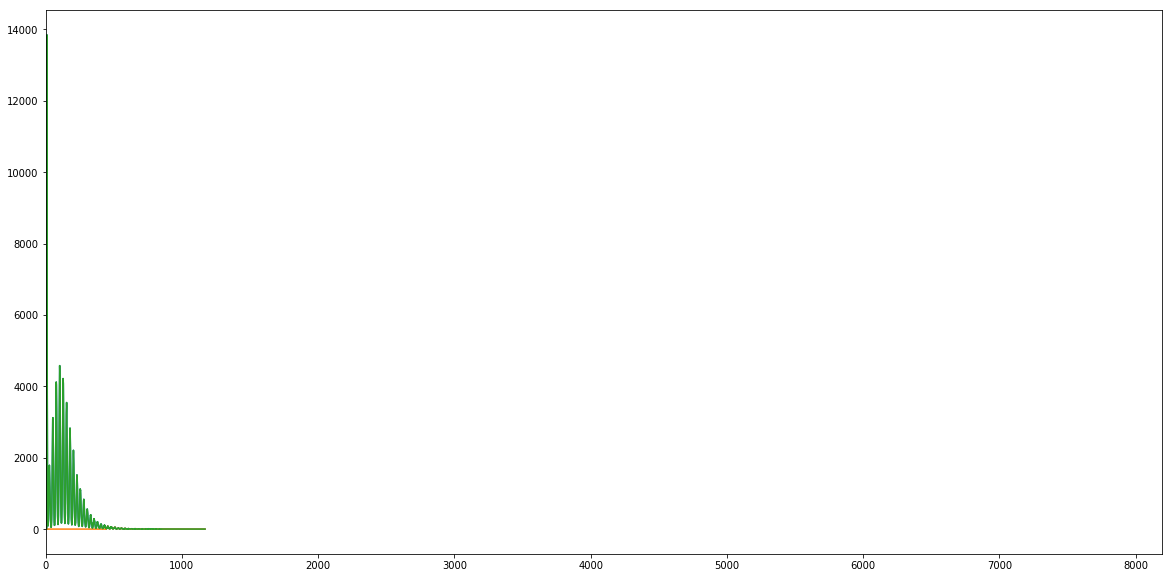

Window_32
Average Distance: 33.38235294117647
First Peak: 9
Last Peak: 1144
Total Number of Peaks: 35
[   9   52   77  102  127  152  177  202  228  253  279  304  352  378
  403  430  456  482  528  554  581  628  676  725  750  778  805  831
  858  883  920  948 1031 1096 1144]
98
['Window_000', 'Window_001', 'Window_002', 'Window_003', 'Window_004', 'Window_005', 'Window_006', 'Window_007', 'Window_008', 'Window_009', 'Window_010', 'Window_011', 'Window_012', 'Window_013', 'Window_014', 'Window_015', 'Window_016', 'Window_017', 'Window_018', 'Window_019', 'Window_020', 'Window_021', 'Window_022', 'Window_023', 'Window_024', 'Window_025', 'Window_026', 'Window_027', 'Window_028', 'Window_029', 'Window_030', 'Window_031', 'Window_032', 'Window_033', 'Window_034', 'Window_035', 'Window_036', 'Window_037', 'Window_038', 'Window_039', 'Window_040', 'Window_041', 'Window_042', 'Window_043', 'Window_044', 'Window_045', 'Window_046', 'Window_047', 'Window_048', 'Window_049', 'Window_050', '

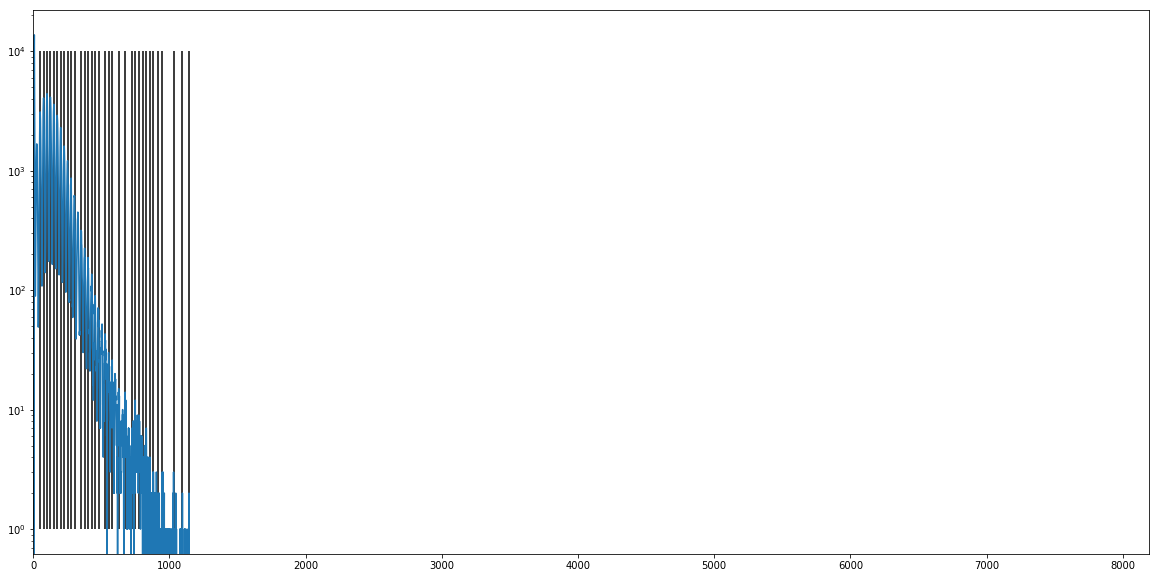

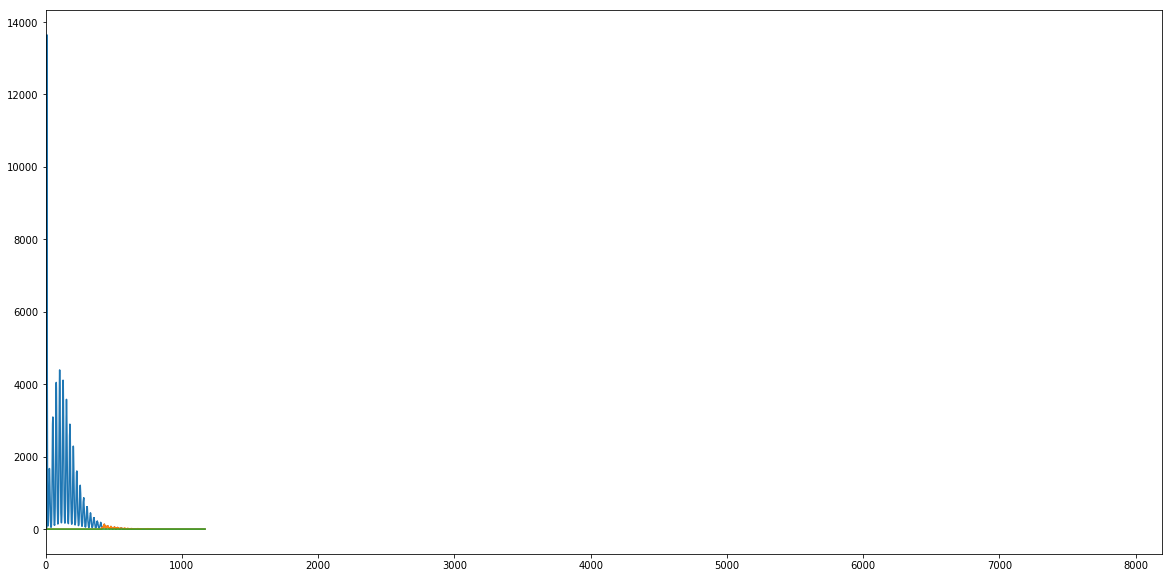

Window_33
Average Distance: 31.714285714285715
First Peak: 9
Last Peak: 1119
Total Number of Peaks: 36
[   9   51   77  102  152  201  226  251  276  302  327  352  377  402
  427  474  499  525  555  600  626  674  699  726  760  797  827  852
  890  916  944  973 1019 1046 1091 1119]
101
['Window_000', 'Window_001', 'Window_002', 'Window_003', 'Window_004', 'Window_005', 'Window_006', 'Window_007', 'Window_008', 'Window_009', 'Window_010', 'Window_011', 'Window_012', 'Window_013', 'Window_014', 'Window_015', 'Window_016', 'Window_017', 'Window_018', 'Window_019', 'Window_020', 'Window_021', 'Window_022', 'Window_023', 'Window_024', 'Window_025', 'Window_026', 'Window_027', 'Window_028', 'Window_029', 'Window_030', 'Window_031', 'Window_032', 'Window_033', 'Window_034', 'Window_035', 'Window_036', 'Window_037', 'Window_038', 'Window_039', 'Window_040', 'Window_041', 'Window_042', 'Window_043', 'Window_044', 'Window_045', 'Window_046', 'Window_047', 'Window_048', 'Window_049', 'Window_

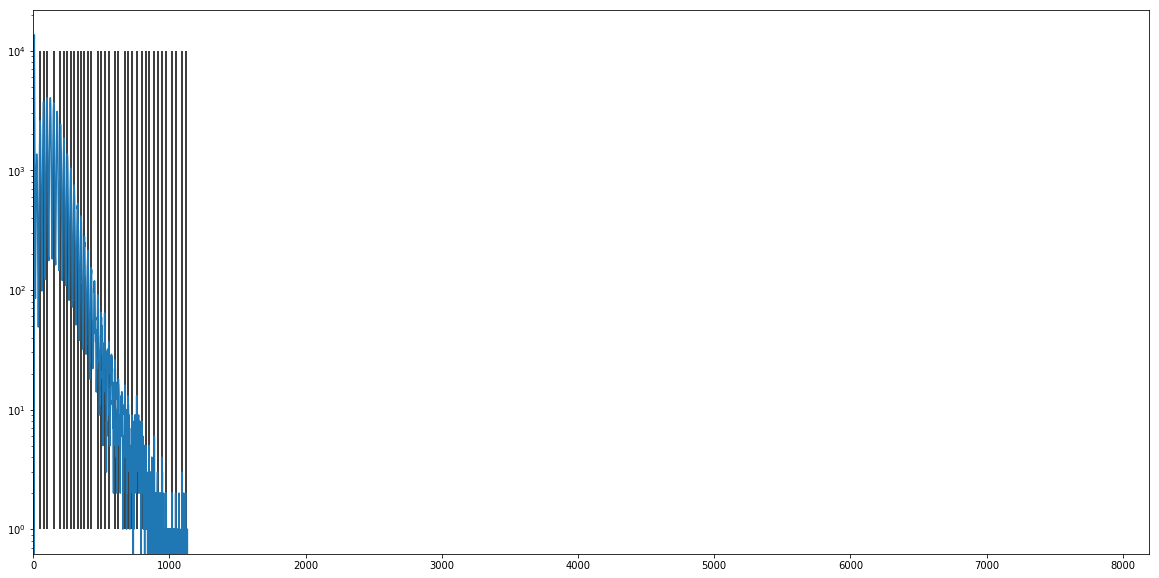

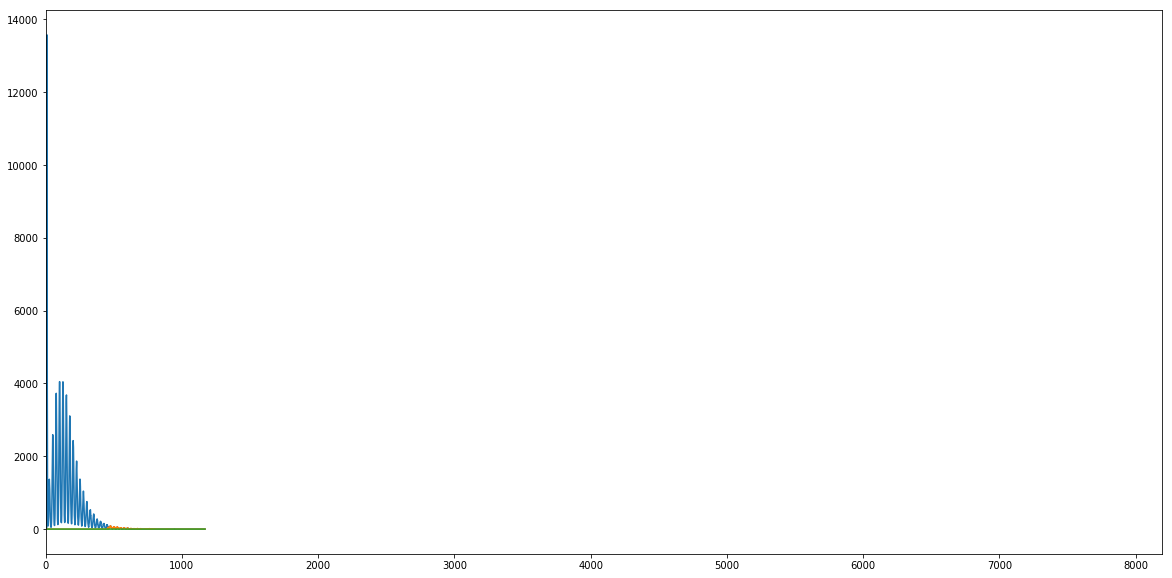

Window_34
Average Distance: 33.875
First Peak: 9
Last Peak: 1093
Total Number of Peaks: 33
[   9   51  100  126  151  176  226  252  299  325  350  399  426  451
  498  526  571  597  626  652  693  719  746  773  818  847  892  918
  950  985 1013 1038 1093]
104
['Window_000', 'Window_001', 'Window_002', 'Window_003', 'Window_004', 'Window_005', 'Window_006', 'Window_007', 'Window_008', 'Window_009', 'Window_010', 'Window_011', 'Window_012', 'Window_013', 'Window_014', 'Window_015', 'Window_016', 'Window_017', 'Window_018', 'Window_019', 'Window_020', 'Window_021', 'Window_022', 'Window_023', 'Window_024', 'Window_025', 'Window_026', 'Window_027', 'Window_028', 'Window_029', 'Window_030', 'Window_031', 'Window_032', 'Window_033', 'Window_034', 'Window_035', 'Window_036', 'Window_037', 'Window_038', 'Window_039', 'Window_040', 'Window_041', 'Window_042', 'Window_043', 'Window_044', 'Window_045', 'Window_046', 'Window_047', 'Window_048', 'Window_049', 'Window_050', 'Window_051', 'Window

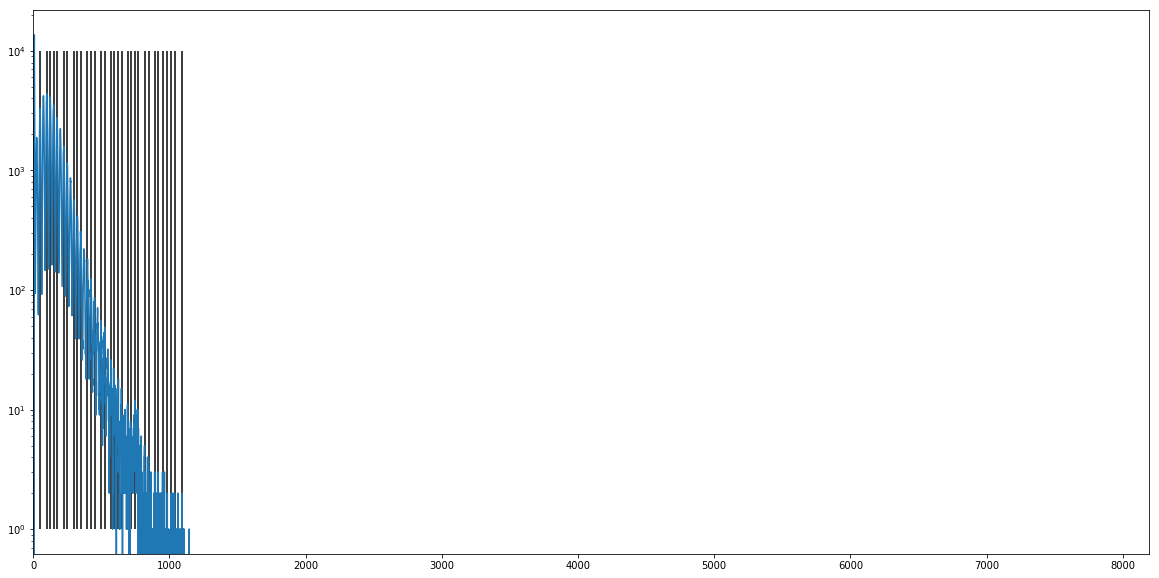

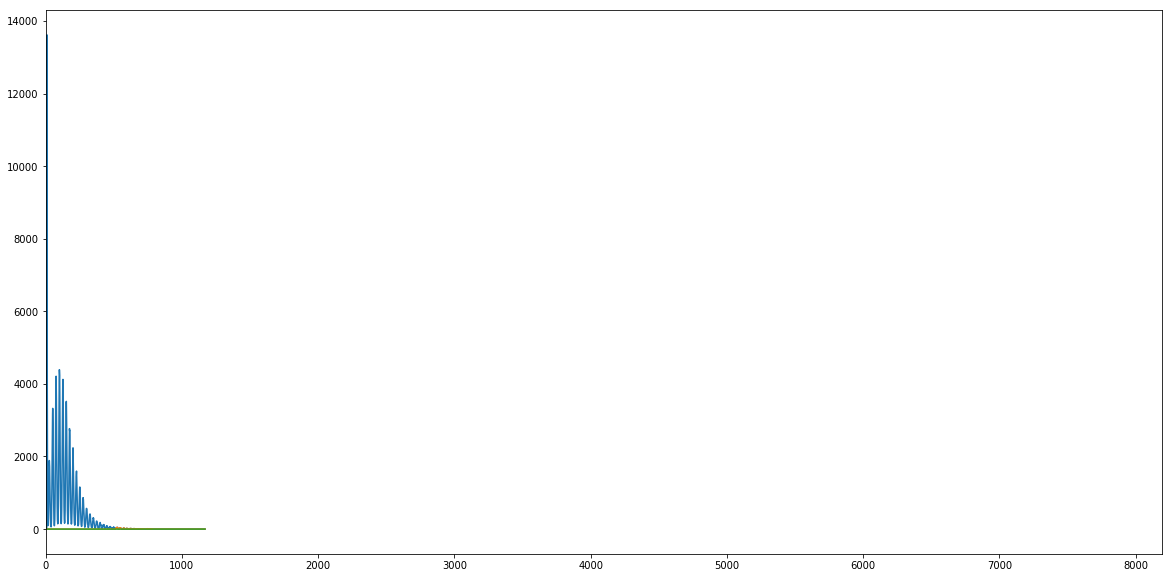

Window_35
Average Distance: 37.61538461538461
First Peak: 9
Last Peak: 987
Total Number of Peaks: 27
[  9  50  75 100 125 175 223 249 275 323 350 375 420 447 496 523 571 614
 640 667 717 750 775 814 859 896 987]
107
['Window_000', 'Window_001', 'Window_002', 'Window_003', 'Window_004', 'Window_005', 'Window_006', 'Window_007', 'Window_008', 'Window_009', 'Window_010', 'Window_011', 'Window_012', 'Window_013', 'Window_014', 'Window_015', 'Window_016', 'Window_017', 'Window_018', 'Window_019', 'Window_020', 'Window_021', 'Window_022', 'Window_023', 'Window_024', 'Window_025', 'Window_026', 'Window_027', 'Window_028', 'Window_029', 'Window_030', 'Window_031', 'Window_032', 'Window_033', 'Window_034', 'Window_035', 'Window_036', 'Window_037', 'Window_038', 'Window_039', 'Window_040', 'Window_041', 'Window_042', 'Window_043', 'Window_044', 'Window_045', 'Window_046', 'Window_047', 'Window_048', 'Window_049', 'Window_050', 'Window_051', 'Window_052', 'Window_053', 'Window_054', 'Window_055',

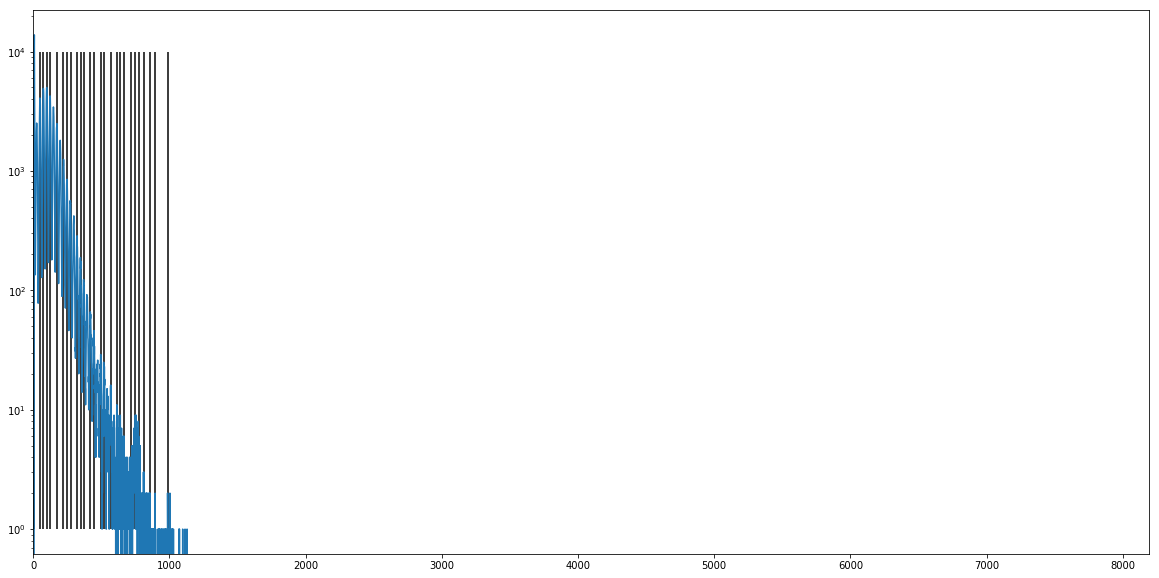

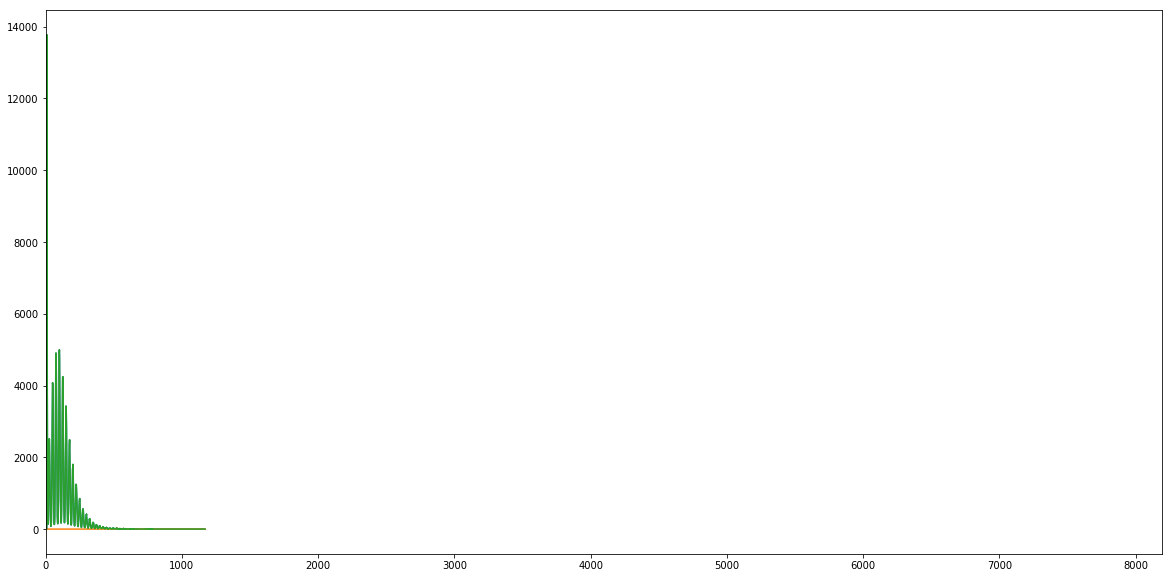

In [4]:
newt = mod.dataFile(path = data.path, file="{}_Ch_0_00_Window_Hist_Test.txt".format(data.path.split('/')[-2]))
for number, column in enumerate(ring):
    print(column)
    #loc = sp.signal.find_peaks(data.get(column), distance=120, height=2)[0]#[1:]
    loc = sp.signal.find_peaks(data.get(column), distance=25, height=2)[0]#[1:]

    me = np.mean(loc[1:] - loc[:-1])
    yaxis = data.get(column)
    xaxis = data.get(xcol)[:yaxis.size]
    print("Average Distance:", me)
    print("First Peak:", loc[0])
    print("Last Peak:", loc[-1])
    print("Total Number of Peaks:", len(loc))
    fig, ax = plt.subplots(figsize = (20, 10))
    ax.plot(xaxis, yaxis)
    ax.vlines(xaxis[loc], 1, 10000)
    
    win = np.ones(len(data.keys()[:-1]))*3
    window = int(win[number])
    count = len(newt.keys())
    print(loc)
    for value in range(window):
        if loc.size > 20*(value + 1):
            end = loc[20*(value + 1)- 5*value*(value != 0)]
        else:
            end = loc[-1]
        if 20*value - 5*value*(value != 0) < loc.size:
            tag = ((loc[20*value - 5*value*(value != 0)] - me/2 <= xaxis) & 
                   (xaxis <= end - me/2))
        else:
            tag = np.ones(yaxis.size).astype(bool)
        newt.set('_'.join(['Window', mod.index_gen(str(value + count), 3)]), yaxis*tag.astype(int))
    print(str(value + count))
    
    fig, bx = plt.subplots(figsize = (20, 10))
    print(sorted(newt.keys(), key = lambda line: int(line.split('_')[1])))
    for line in sorted(newt.keys(), 
                       key = lambda line: int(line.split('_')[1]))[int(sum(win[:number])):]:
        print(line)
        bx.plot(xaxis, newt.get(line))
#     bx.set_xlim(0, [8192, 4096][number == 2])
    bx.set_xlim(0, 8192)

    
    for value in range(window):
        if loc.size > 20*(value + 1):
            end = loc[20*(value + 1)- 5*value*(value != 0)]
        else:
            end = loc[-1]
#         ax.fill_between((loc[20*value - 5*value*(value != 0)] - me/2,
#                          end - me/2), 
#                         1, (windows - value)*1e4, color = mod.colors(-10, value))
    num = 0
#     ax.set_xlim(num*6000, [(num + 1)*6000, 2048][number == 2])
    ax.set_xlim(0, 8192)
    ax.set_yscale('log')
    plt.show()

In [5]:
# newt.set('x_axis', data.get('MCA Channel')[:8192] + 0.5)
newt.set('x_axis', data.get('x_axis'))
newt.save(Columns = ['x_axis'] + sorted(newt.keys()[:-1], key = lambda line: int(line.split('_')[1])))

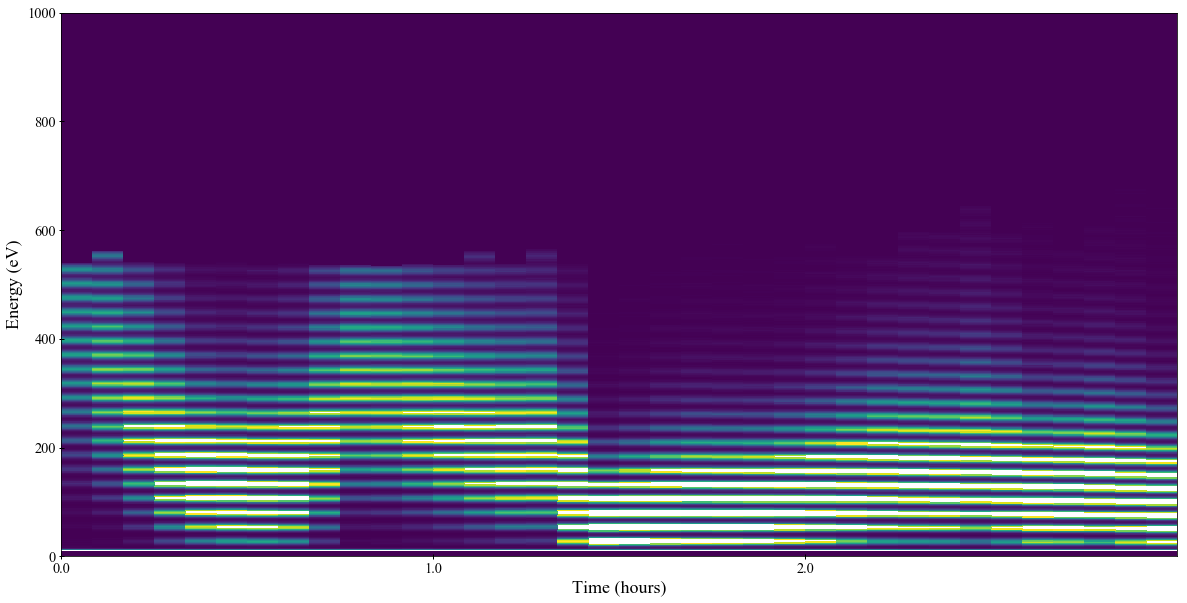

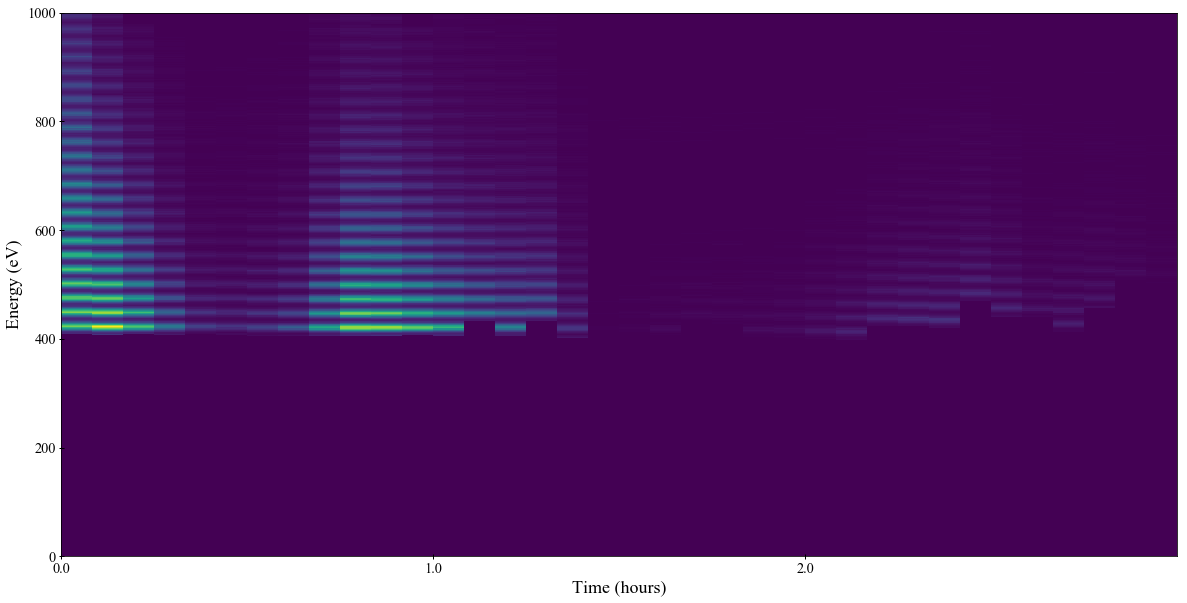

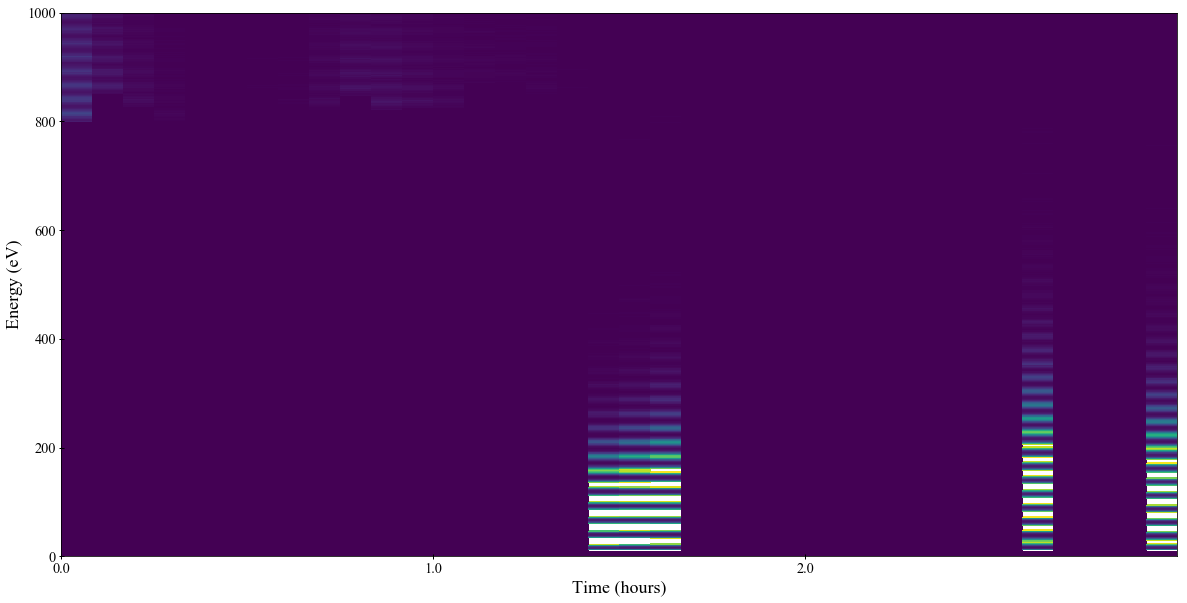

In [6]:
for num in range(3):
    ring = ['x_axis'] + sorted(newt.keys()[:-1], key = lambda line: int(line.split('_')[1]))[num::3]
    dump = mod.dataFile(path = data.path,
                        file="{}_Ch_{}_00_Window_Hist.txt".format(data.path.split('/')[-2], 2*num))
    for line in ring:
        dump.set(line, newt.get(line))
    dump.save(Columns = ['x_axis'] + sorted(dump.keys()[:-1], key = lambda line: int(line.split('_')[1])))
    heatmap(dump, ring[1:])